Read the CSV file created by the CCU Historian, ensure that field separator is ';' and decimal separator is '.', if necessary edit CSV file before reading it by the provided script 'csv_convert_historian.bsh'<br/>
scale the sensor readings according the set conversion factors

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from datetime import datetime

import numpy as np


dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')

scale1=2000    #sensor 1's gas readings arescaled by a factor of 2000 Ohms/deg C
scale2=2000    #sensor 2's gas readings arescaled by a factor of 2000 Ohms/deg C
scale3=4000    #sensor 3's gas readings arescaled by a factor of 4000 Ohms/deg C
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
 
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3
#df.shape
#df.columns
#df.dtypes

df.head()
#df['Datum']
#type(df['sensor 1'][0])

,Datum,Mode,sensor 1,sensor 2,sensor 3,rLF außen,temperature,absolute humidity außen
0,2020-10-04 17:10:39.329,2,89800.0,77600.0,406000.0,66,13.4,7.667
1,2020-10-04 17:11:02.903,2,89800.0,77600.0,406000.0,66,13.4,7.667
2,2020-10-04 17:11:02.913,2,89800.0,77600.0,406000.0,66,13.4,7.667
3,2020-10-04 17:11:52.502,2,90000.0,77600.0,406000.0,66,13.4,7.667
4,2020-10-04 17:12:09.850,2,90000.0,77200.0,406000.0,66,13.4,7.667


Time series diagram of the raw gas resistance of sensor 1

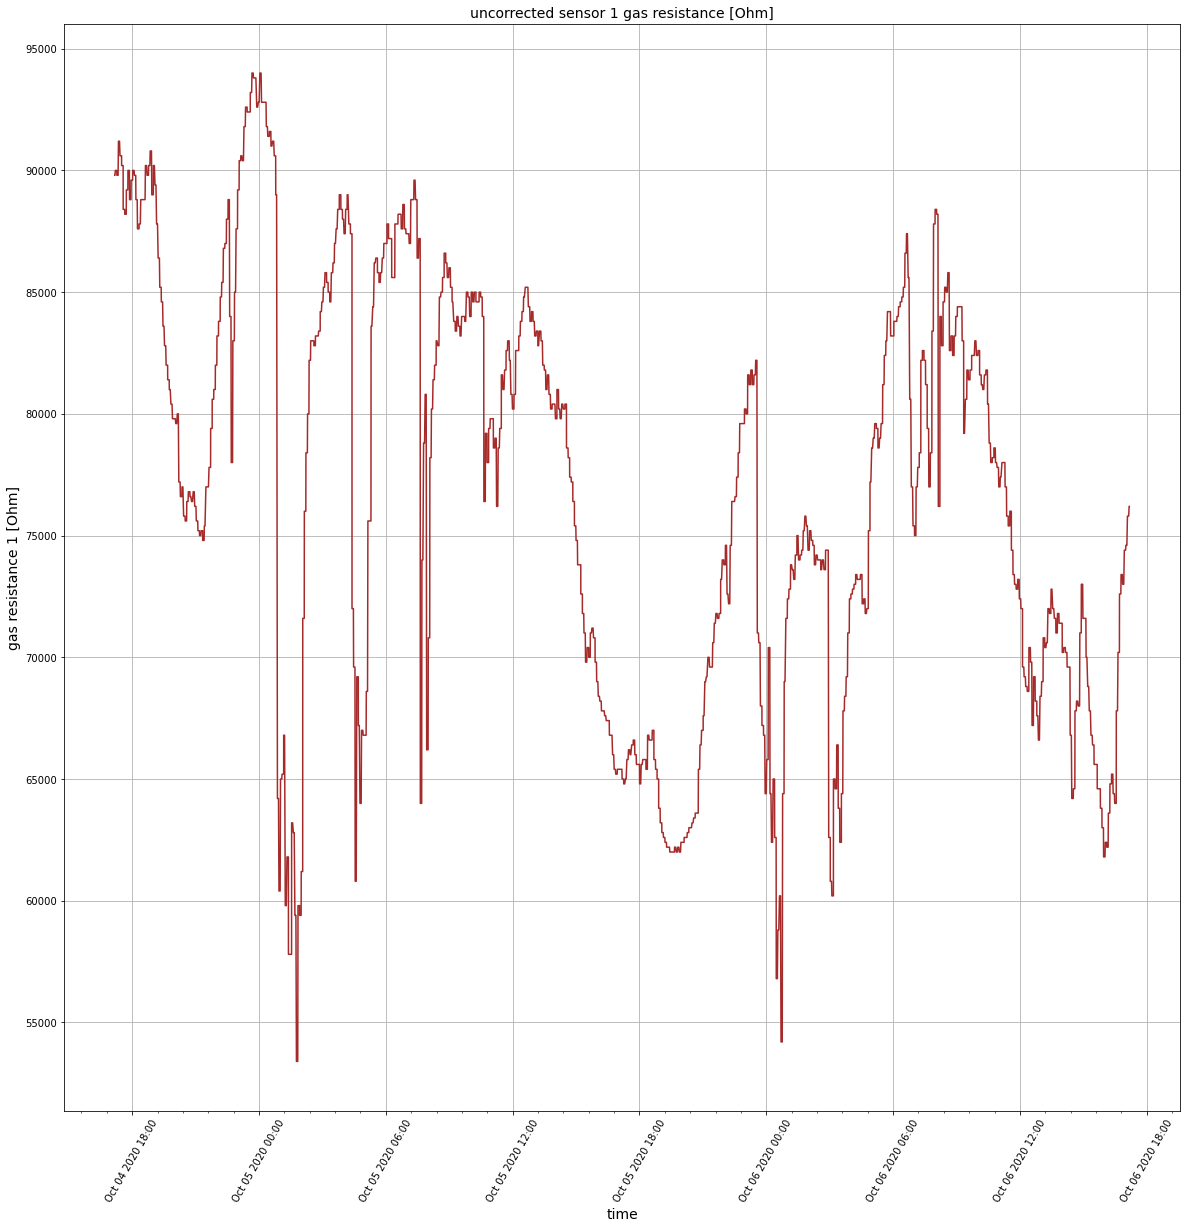

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.plot_date(df['Datum'], df['sensor 1'], linestyle='solid', marker=" ", color='brown')         
plt.title('uncorrected sensor 1 gas resistance [Ohm]', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('gas resistance 1 [Ohm]', fontsize=14)
plt.grid(True)
plt.show()

Time series diagram of the raw gas resistance of sensor 2

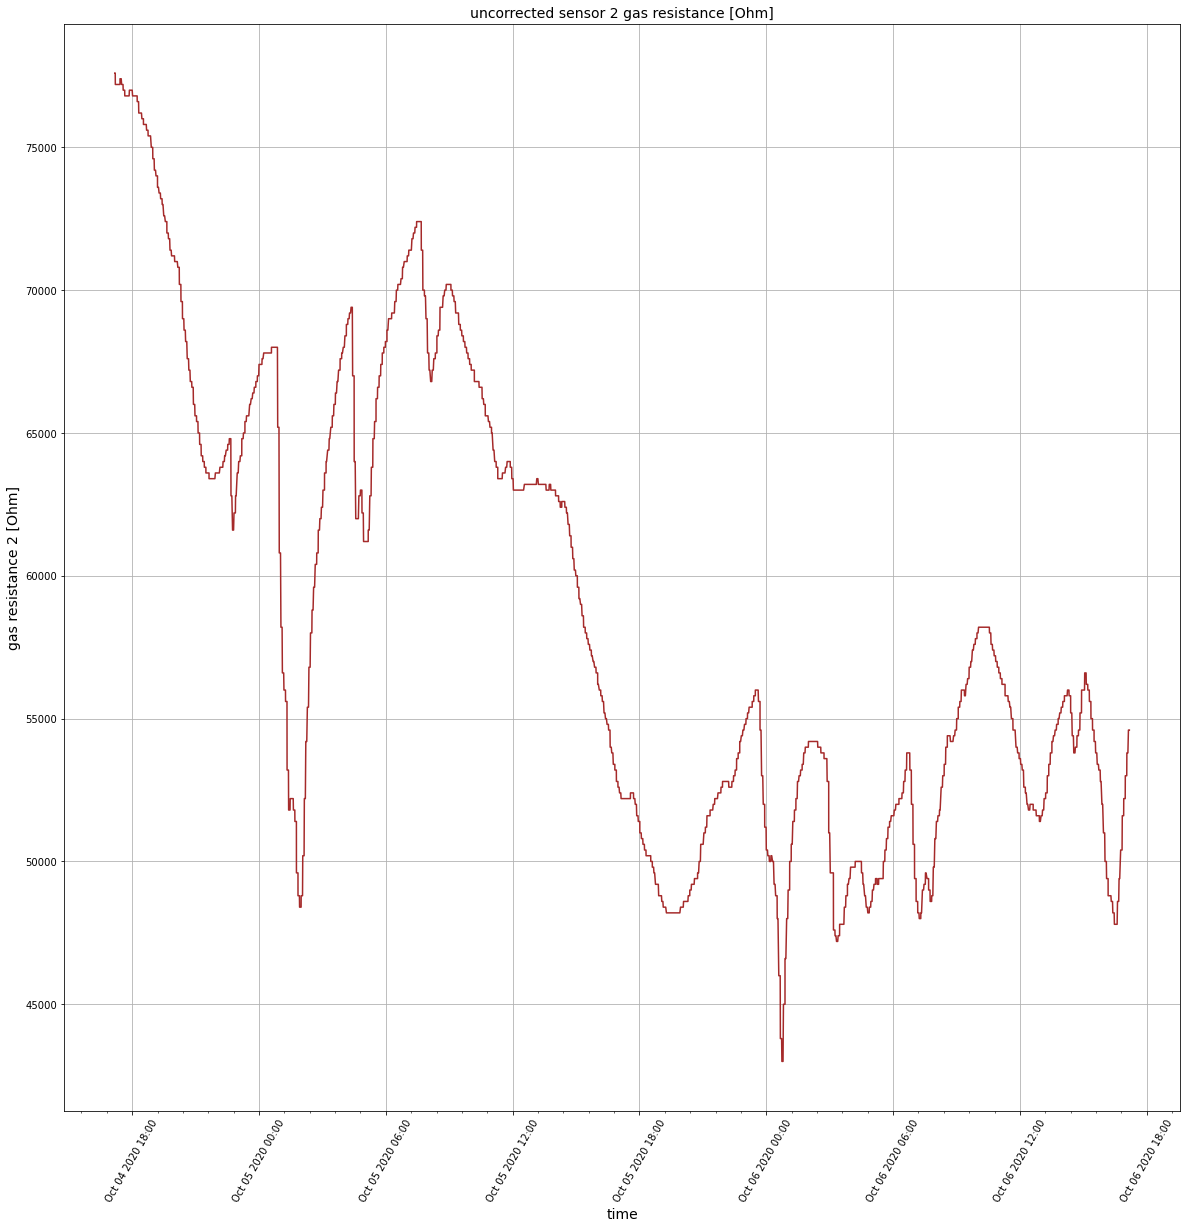

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.plot_date(df['Datum'], df['sensor 2'], linestyle='solid', marker=" ", color='brown')         
plt.title('uncorrected sensor 2 gas resistance [Ohm]', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('gas resistance 2 [Ohm]', fontsize=14)
plt.grid(True)
plt.show()

Time series diagram of the raw gas resistance of sensor 3

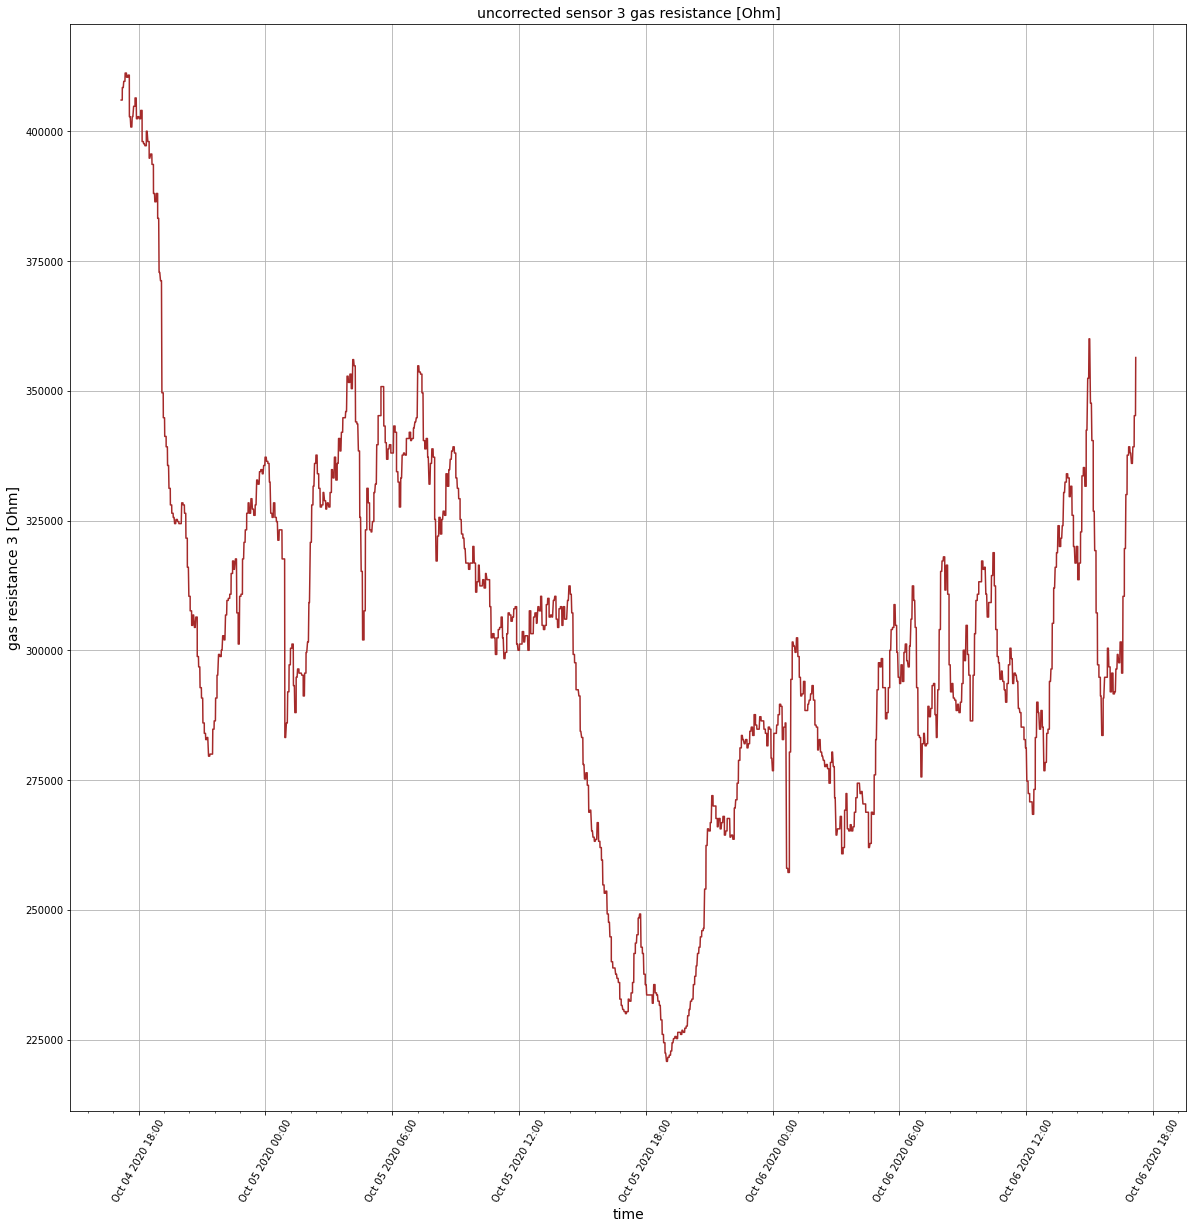

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

scale3=4000

plt.plot_date(df['Datum'], df['sensor 3'], linestyle='solid', marker=" ", color='brown')         
plt.title('uncorrected sensor 3 gas resistance [Ohm]', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('gas resistance 3 [Ohm]', fontsize=14)
plt.grid(True)
plt.show()

Time series diagrams of the raw gas resistances of sensors 1-3

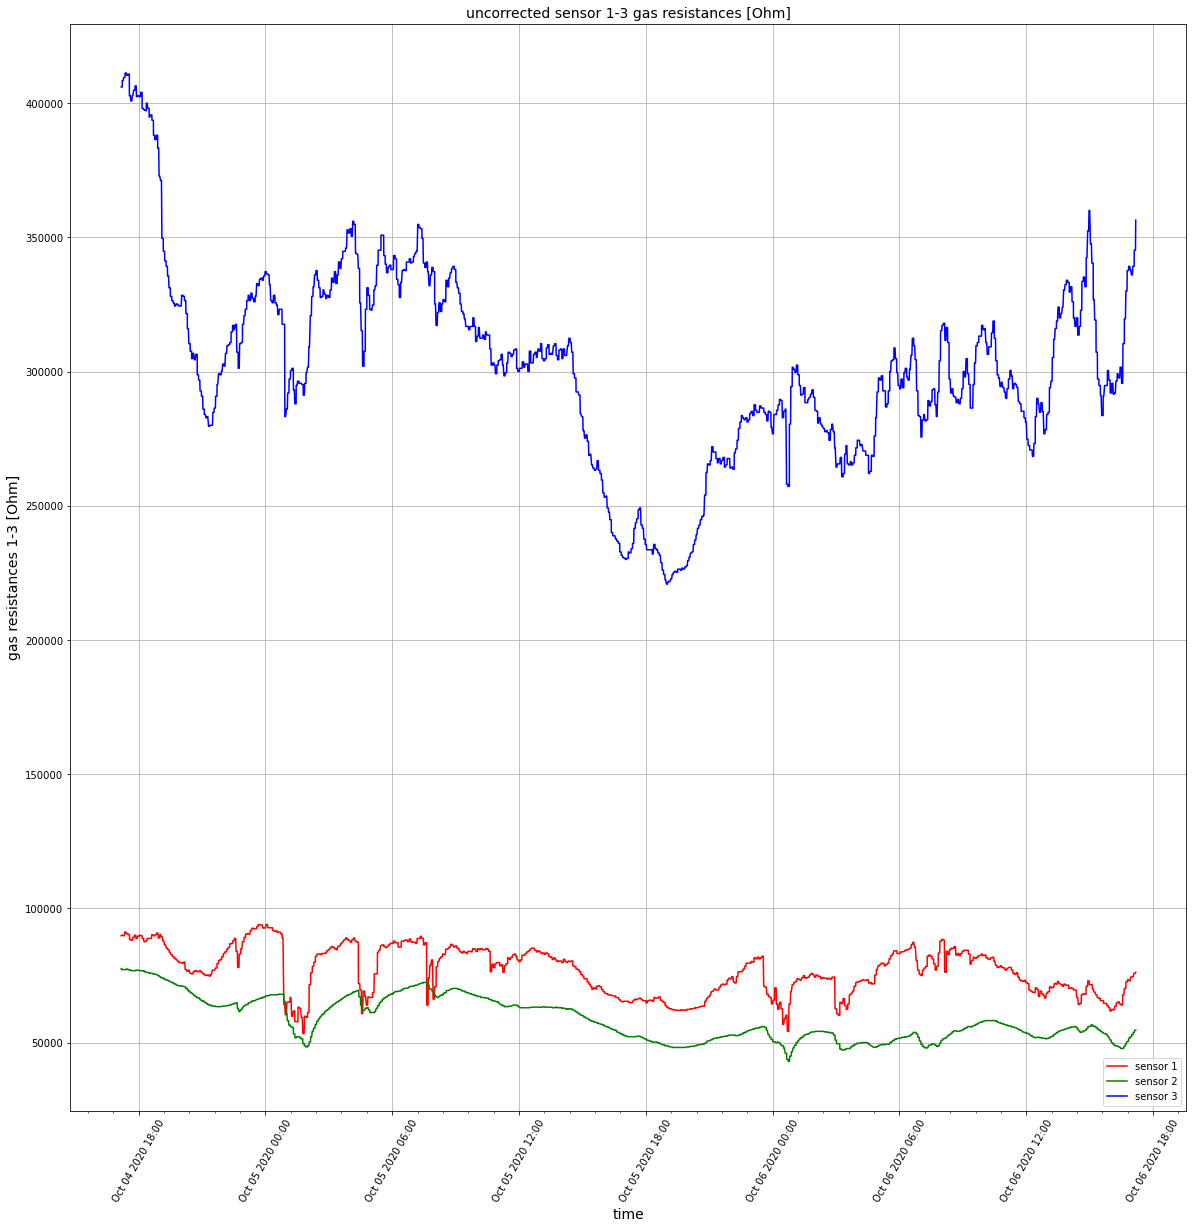

In [5]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.plot_date(df['Datum'], df['sensor 1'], linestyle='solid', marker=" ", color='red', label='sensor 1')
plt.plot_date(df['Datum'], df['sensor 2'], linestyle='solid', marker=" ", color='green', label='sensor 2')
plt.plot_date(df['Datum'], df['sensor 3'], linestyle='solid', marker=" ", color='blue', label='sensor 3')
plt.legend(loc ="lower right") 
plt.title('uncorrected sensor 1-3 gas resistances [Ohm]', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('gas resistances 1-3 [Ohm]', fontsize=14)
plt.grid(True)
plt.show()

Scatter plot of raw gas resistance of sensor 1 versus the absolute humidity, 

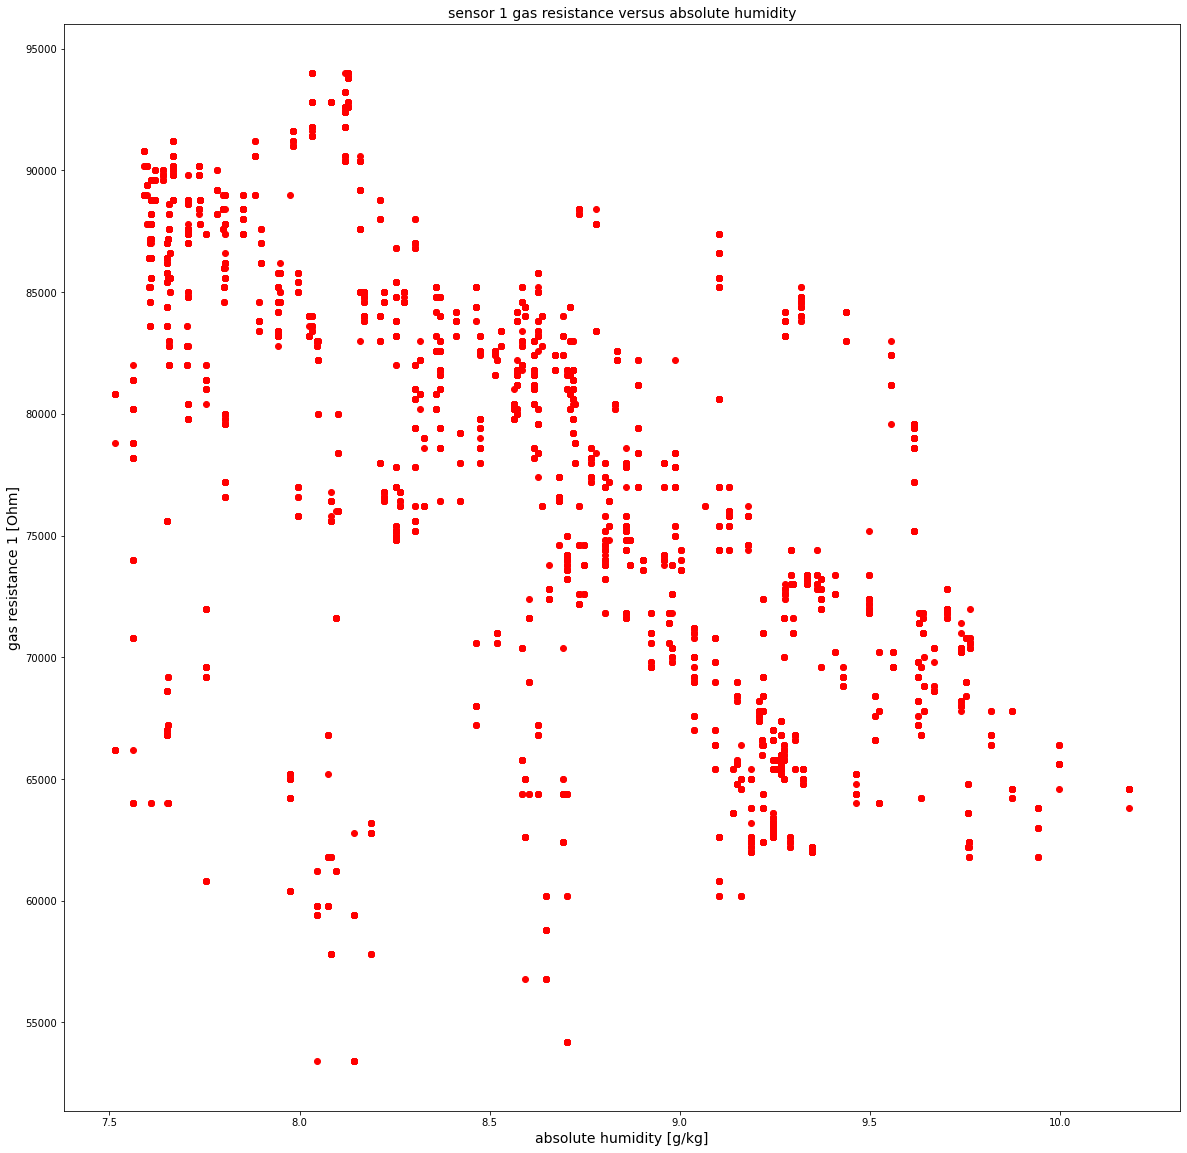

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

plt.figure(figsize=(20,20))

plt.scatter(df['absolute humidity außen'], df['sensor 1'], color='red')
plt.title('sensor 1 gas resistance versus absolute humidity', fontsize=14)
plt.xlabel('absolute humidity [g/kg]', fontsize=14)
plt.ylabel('gas resistance 1 [Ohm]', fontsize=14)
plt.show()

Scatter plot of raw gas resistance of sensor 2 versus the absolute humidity, is the dependency somehow linear?

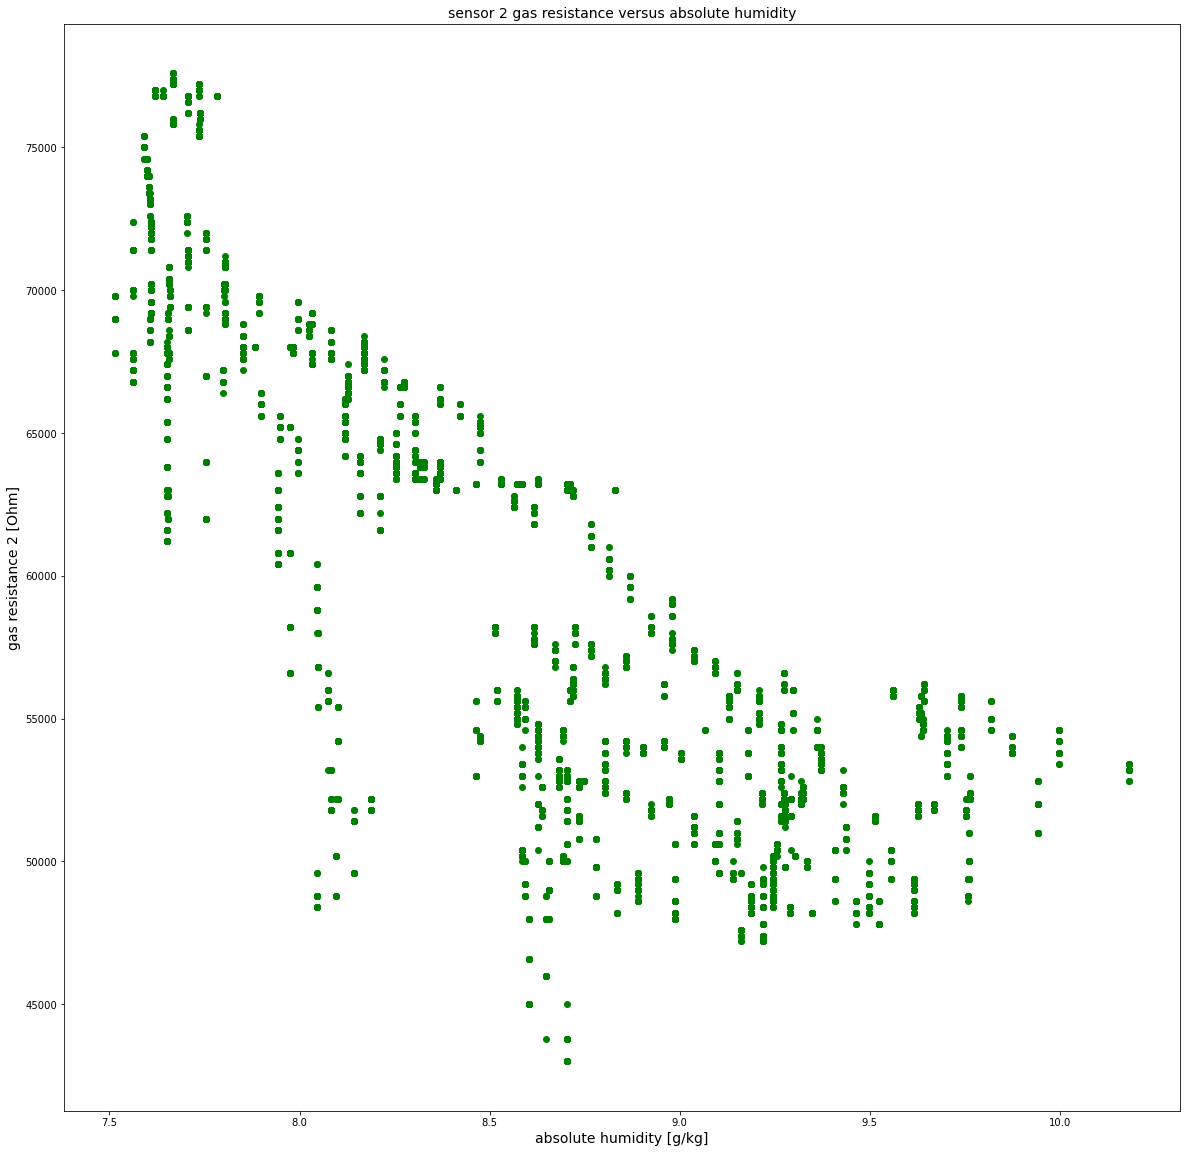

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

plt.figure(figsize=(20,20))
plt.scatter(df['absolute humidity außen'], df['sensor 2'], color='green')
plt.title('sensor 2 gas resistance versus absolute humidity', fontsize=14)
plt.xlabel('absolute humidity [g/kg]', fontsize=14)
plt.ylabel('gas resistance 2 [Ohm]', fontsize=14)
plt.grid(False)
plt.show()

Scatter plot of raw gas resistance of sensor 3 versus the absolute humidity, is the dependency somehow linear?

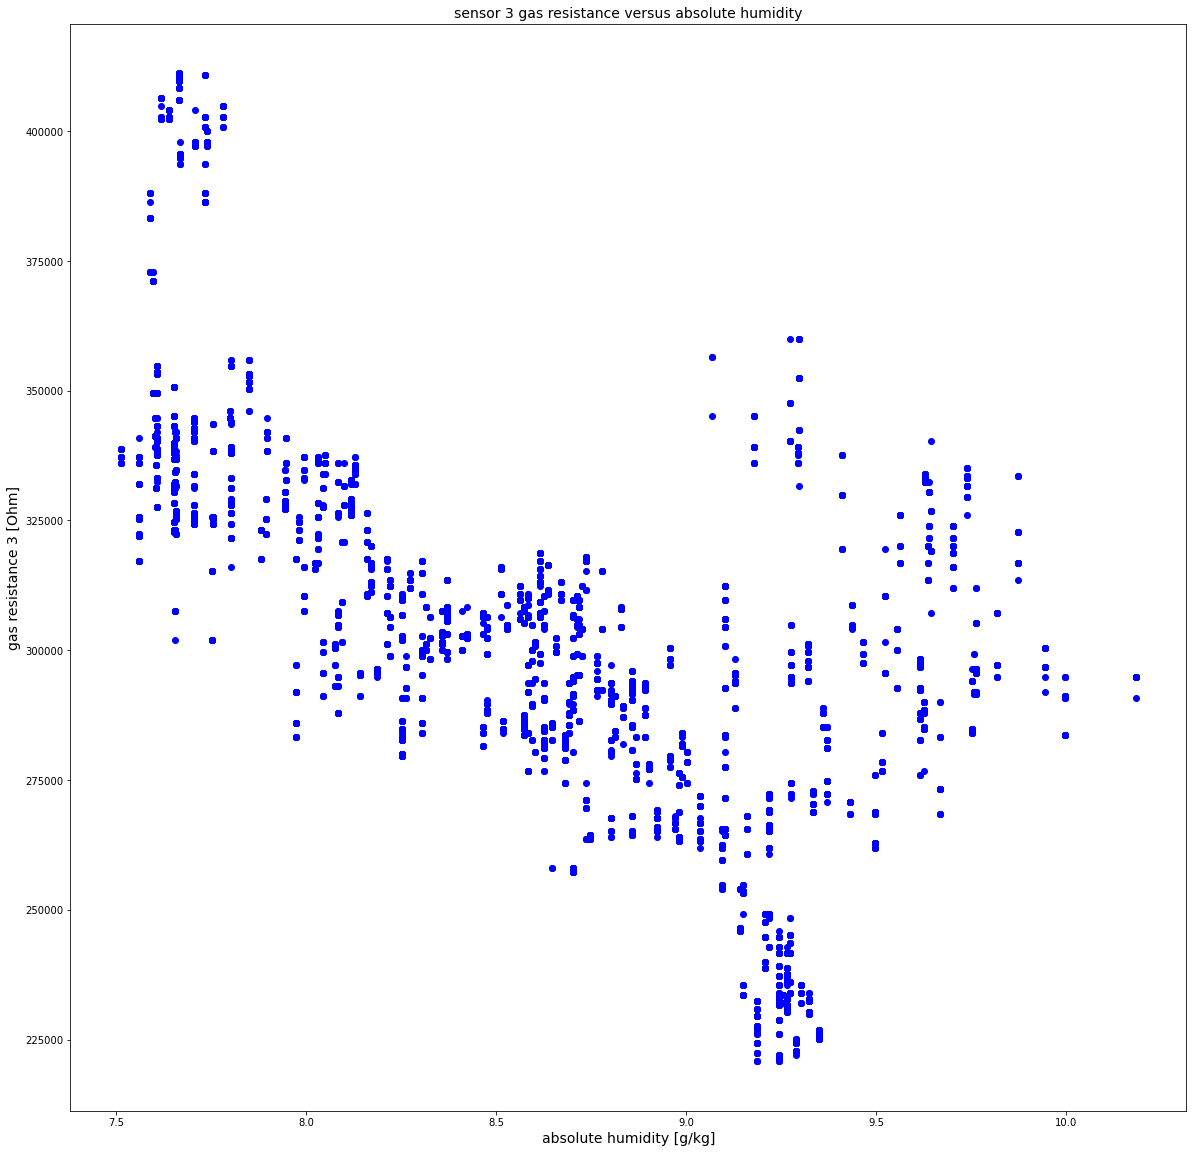

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

plt.figure(figsize=(20,20))
plt.scatter(df['absolute humidity außen'], df['sensor 3'], color='blue')
plt.title('sensor 3 gas resistance versus absolute humidity', fontsize=14)
plt.xlabel('absolute humidity [g/kg]', fontsize=14)
plt.ylabel('gas resistance 3 [Ohm]', fontsize=14)
plt.grid(False)
plt.show()

Scatter plot of raw gas resistance of sensor 1 versus the temperature, is the dependency somehow linear?

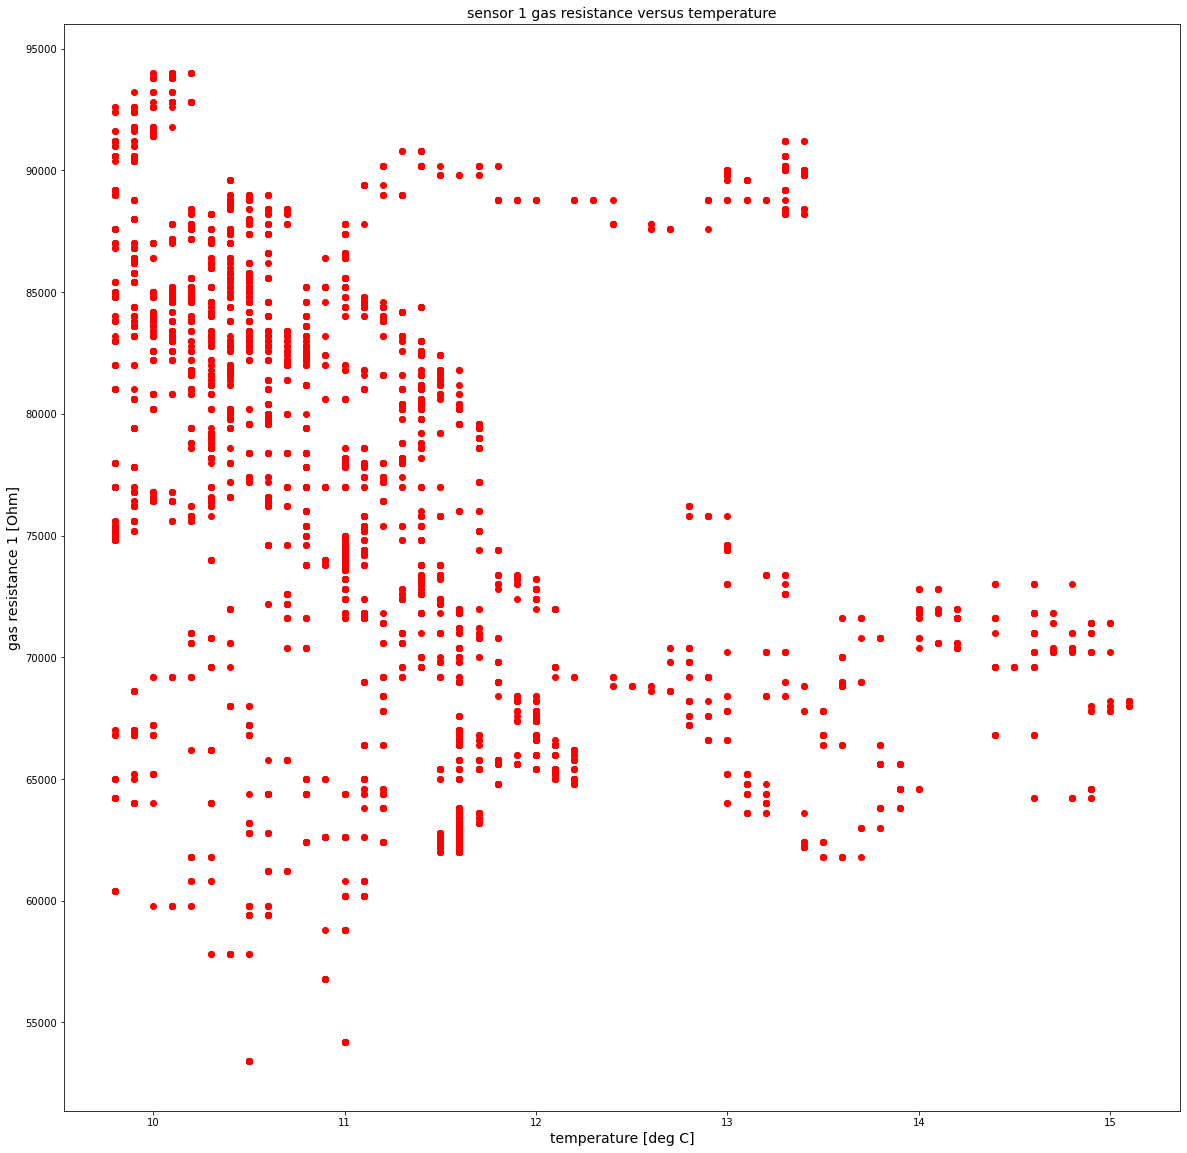

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

plt.figure(figsize=(20,20))
plt.scatter(df['temperature'], df['sensor 1'], color='red')
plt.title('sensor 1 gas resistance versus temperature', fontsize=14)
plt.xlabel('temperature [deg C]', fontsize=14)
plt.ylabel('gas resistance 1 [Ohm]', fontsize=14)
plt.grid(False)
plt.show()

Scatter plot of raw gas resistance of sensor 2 versus the temperature, is the dependency somehow linear?

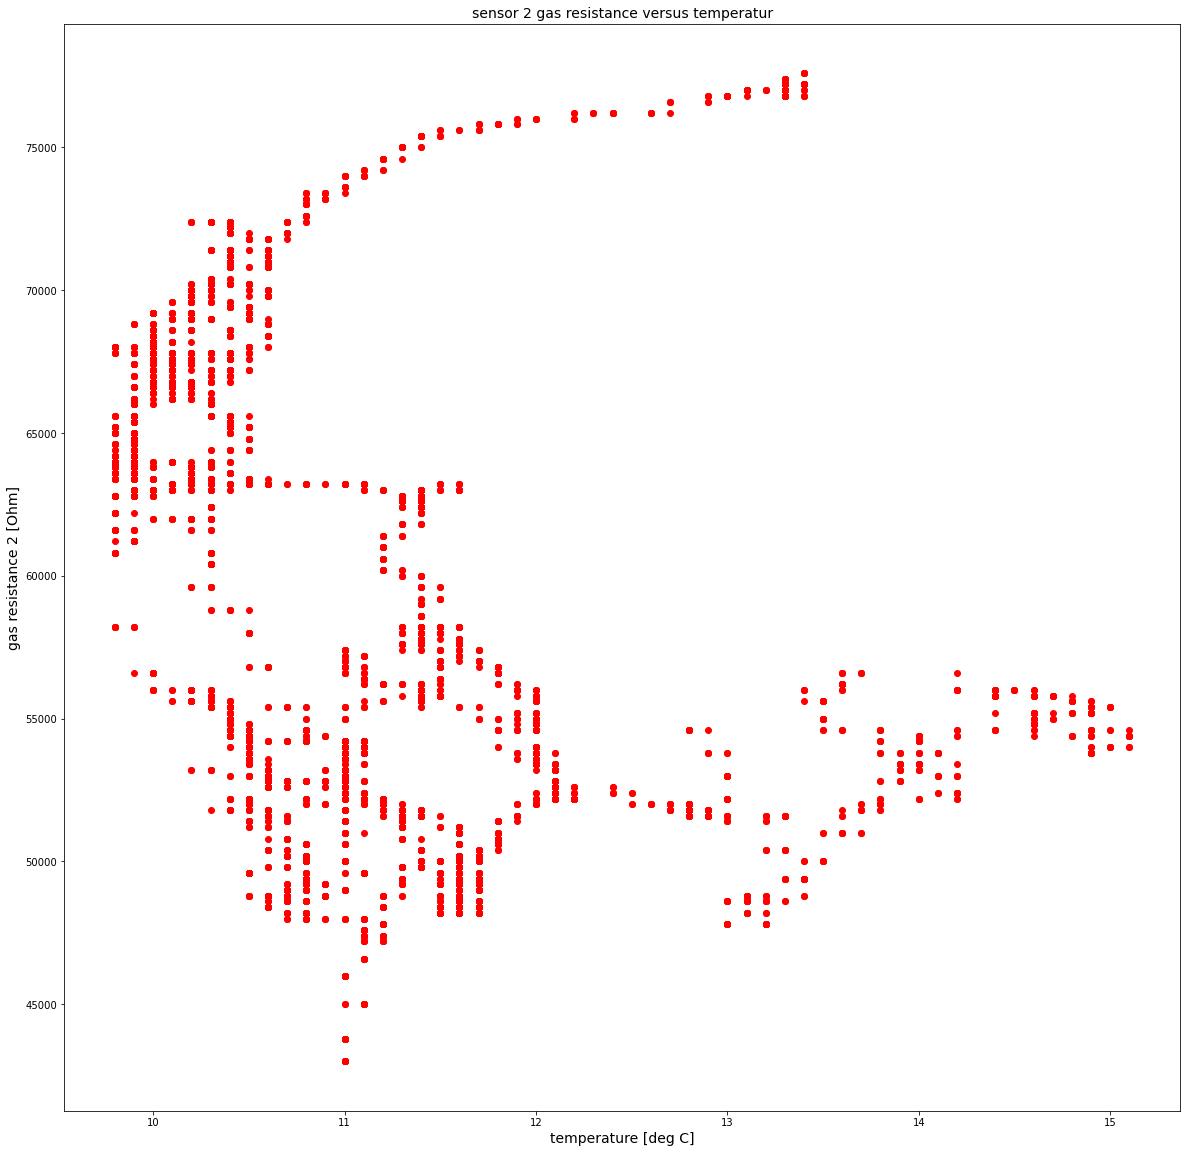

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

plt.figure(figsize=(20,20))
plt.scatter(df['temperature'], df['sensor 2'], color='red')
plt.title('sensor 2 gas resistance versus temperatur', fontsize=14)
plt.xlabel('temperature [deg C]', fontsize=14)
plt.ylabel('gas resistance 2 [Ohm]', fontsize=14)
plt.grid(False)
plt.show()

Scatter plot of raw gas resistance of sensor 3 versus raw gas resistance of sensor 1, is the dependency somehow linear?

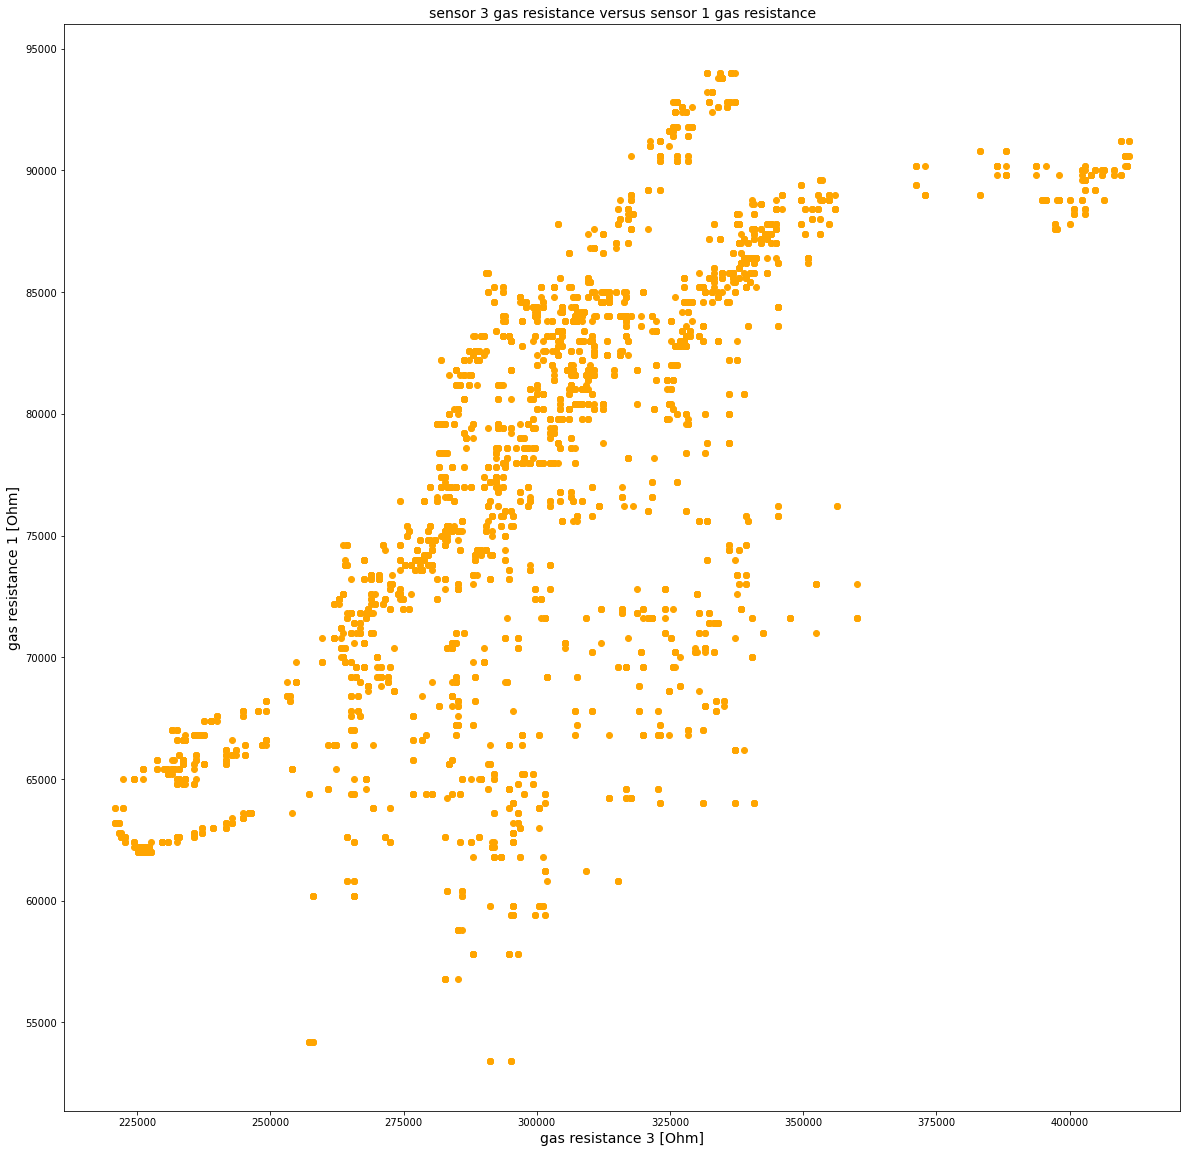

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

plt.figure(figsize=(20,20))
plt.scatter(df['sensor 3'], df['sensor 1'], color='orange')
plt.title('sensor 3 gas resistance versus sensor 1 gas resistance', fontsize=14)
plt.xlabel('gas resistance 3 [Ohm]', fontsize=14)
plt.ylabel('gas resistance 1 [Ohm]', fontsize=14)
plt.grid(False)
plt.show()

Scatter plot of raw gas resistance of sensor 2 versus raw gas resistance of sensor 1, is the dependency somehow linear?

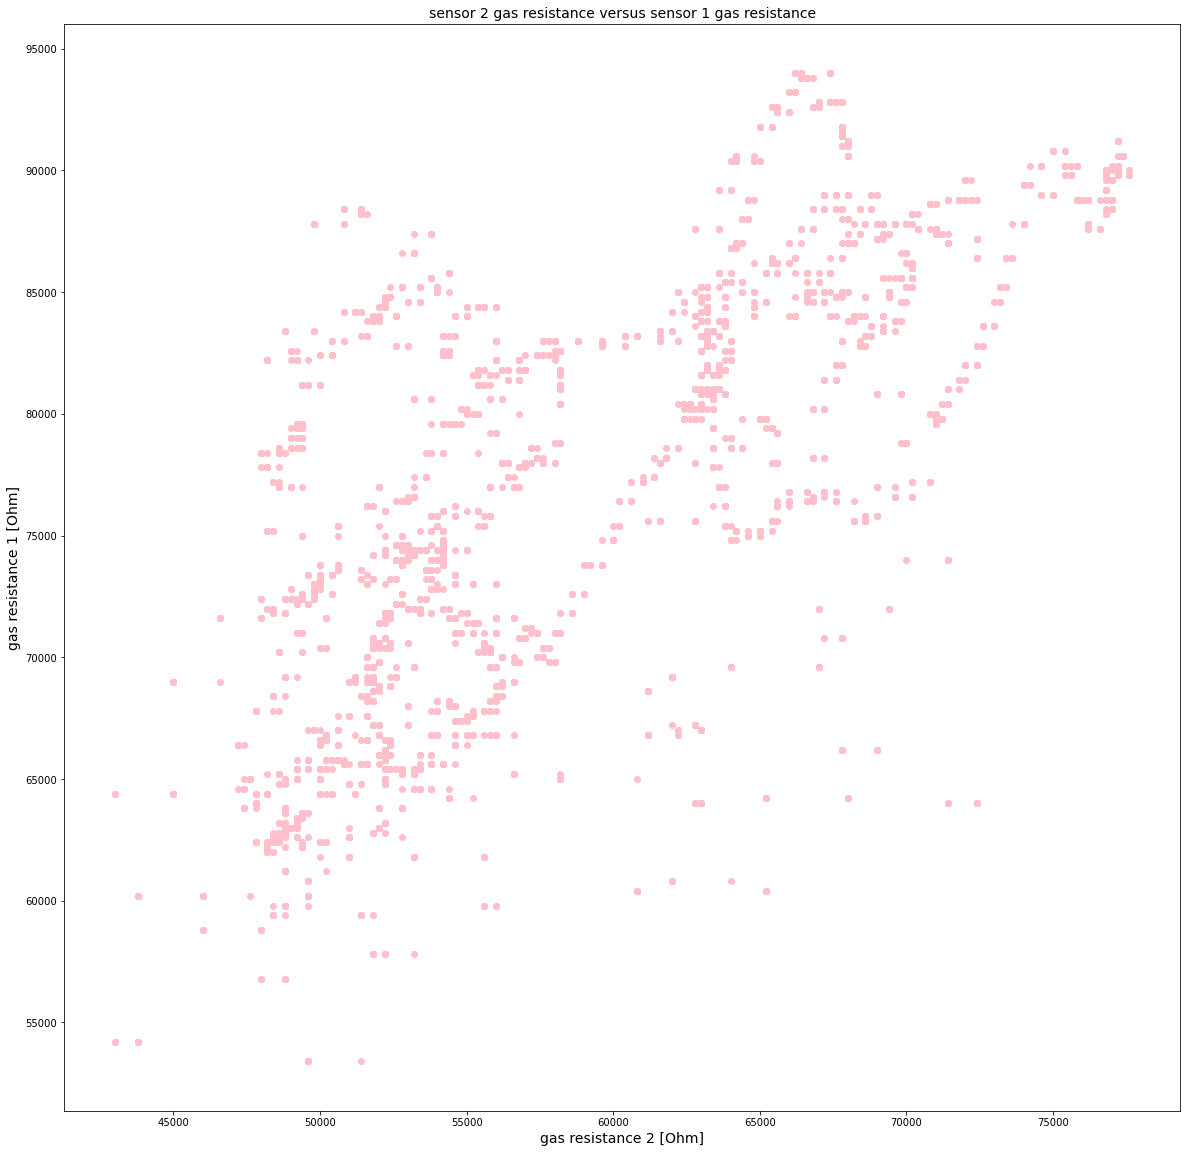

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

plt.figure(figsize=(20,20))
plt.scatter(df['sensor 2'], df['sensor 1'], color='pink')
plt.title('sensor 2 gas resistance versus sensor 1 gas resistance', fontsize=14)
plt.xlabel('gas resistance 2 [Ohm]', fontsize=14)
plt.ylabel('gas resistance 1 [Ohm]', fontsize=14)
plt.grid(False)
plt.show()

Scatter plot of raw gas resistance of sensor 2 versus raw gas resistance of sensor 3, is the dependency somehow linear?

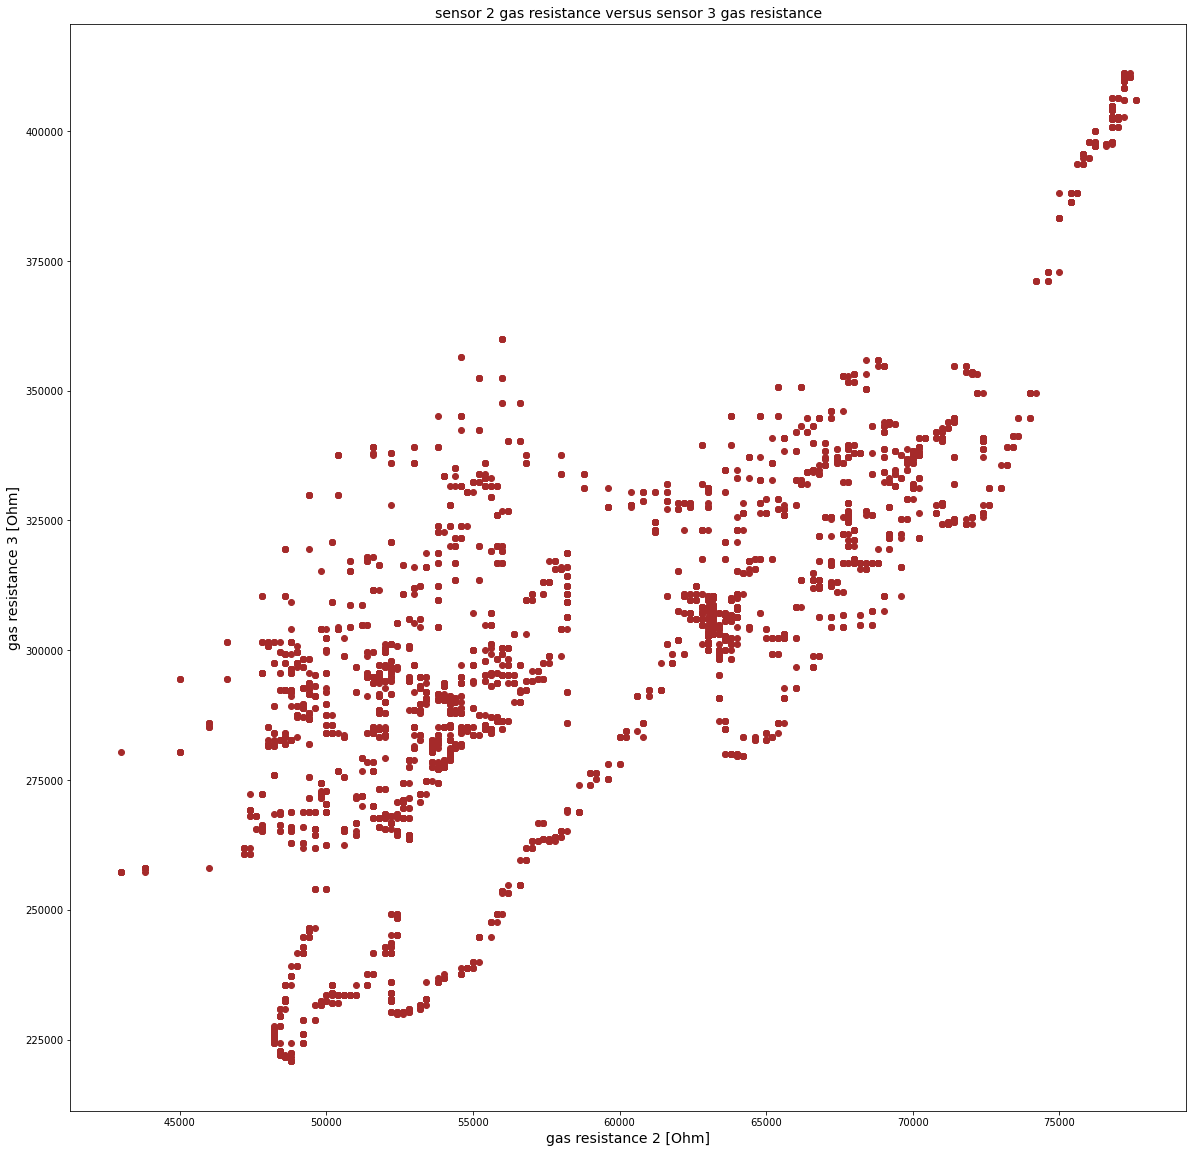

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

plt.figure(figsize=(20,20))
plt.scatter(df['sensor 2'], df['sensor 3'], color='brown')
plt.title('sensor 2 gas resistance versus sensor 3 gas resistance', fontsize=14)
plt.xlabel('gas resistance 2 [Ohm]', fontsize=14)
plt.ylabel('gas resistance 3 [Ohm]', fontsize=14)
plt.grid(False)
plt.show()

multiple linear regression of raw gas resistance of sensor 1 in dependency of the absolute humidity and the temperature<br/>
use the prediction 'predictions1' of the mutiple linear regression to create a corrected gas resistance 'residuals1' with eliminated influence of the absolute humidity and the temperature<br/>
create a normalized scaled corrected gas resistance 'normalized_residuals1'

Intercept: 
 146820.37610144832
Coefficients: 
 [   72.584693   -8213.53828816]
                                 OLS Regression Results                                
Dep. Variable:               sensor 1   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          7.596e+04
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        17:11:03   Log-Likelihood:                         -49368.
No. Observations:                4528   AIC:                                  9.874e+04
Df Residuals:                    4526   BIC:                                  9.875e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                              coef    st

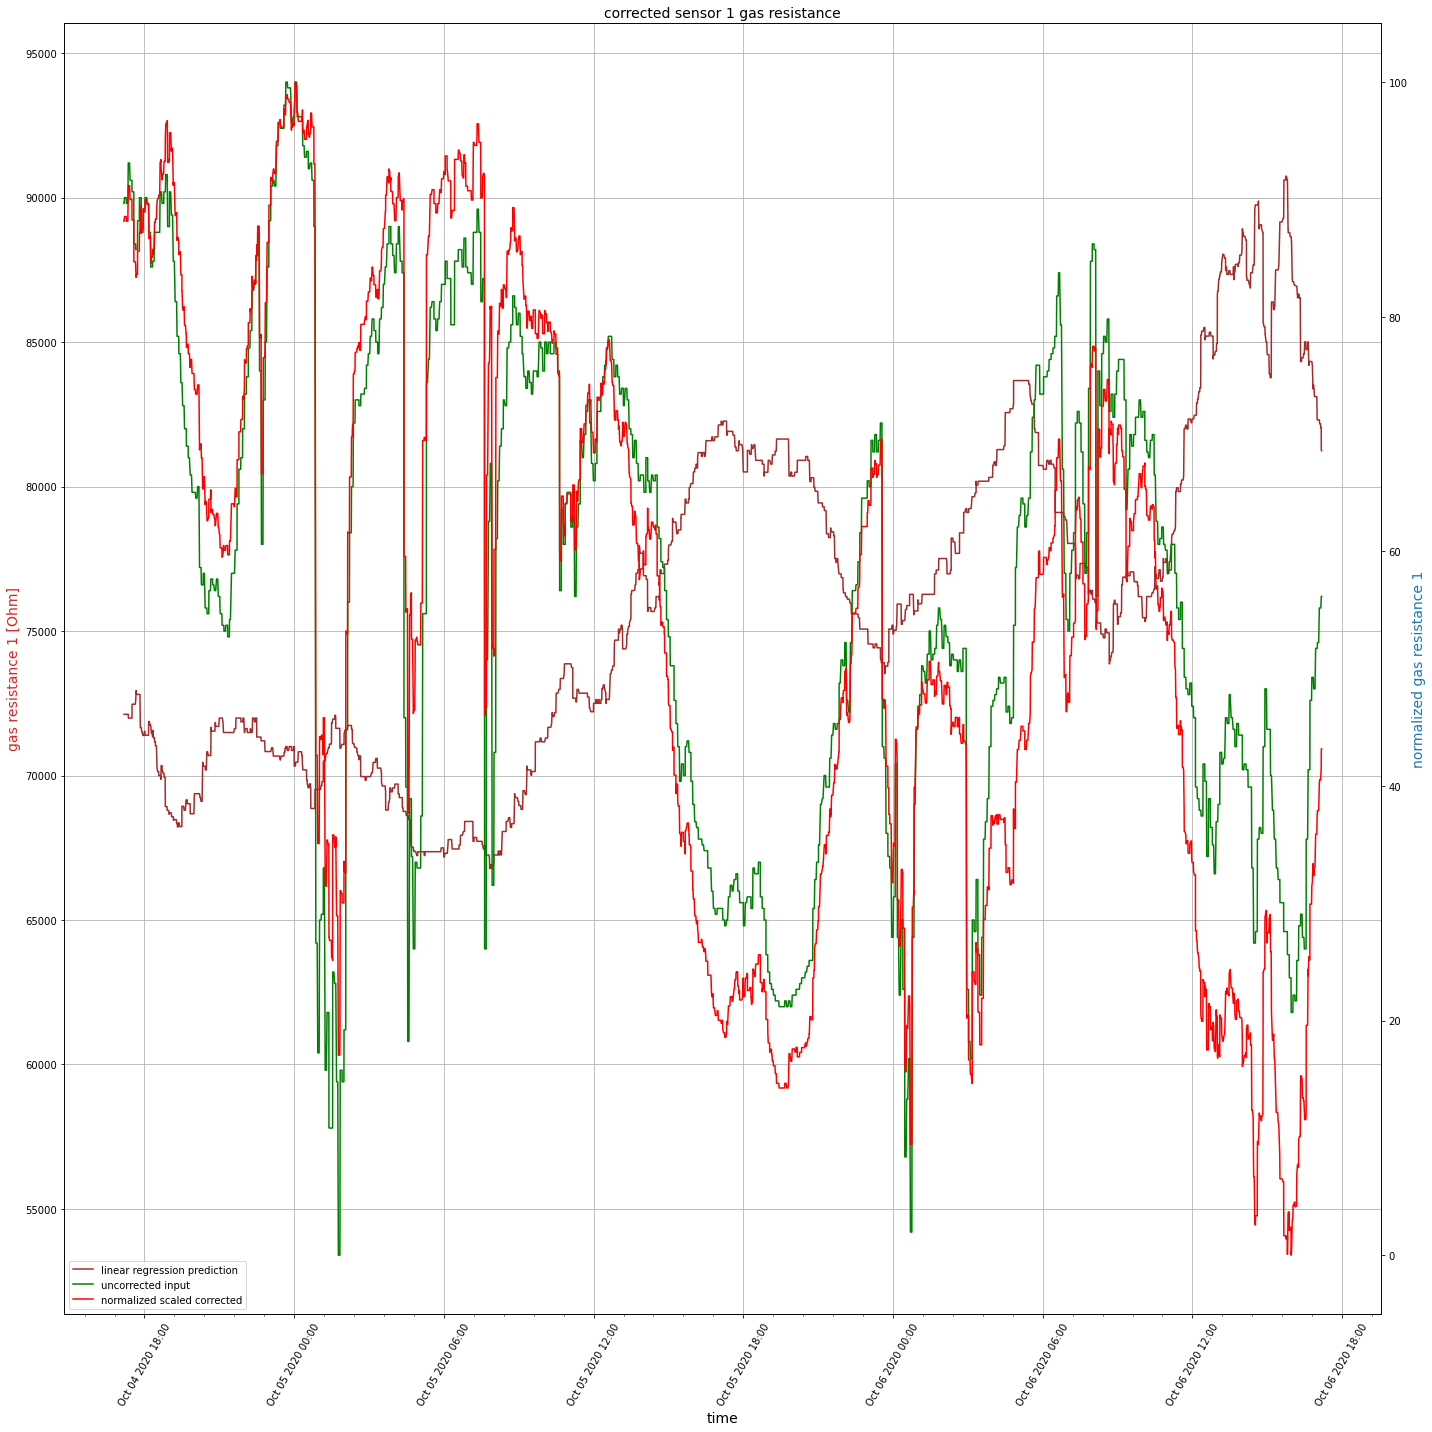

In [14]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

X = df[['temperature','absolute humidity außen']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['sensor 1']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 
model = sm.OLS(Y, X).fit()
predictions1 = model.predict(X) 
 
print_model = model.summary()
print(print_model)
print(model.rsquared)

residuals1=df['sensor 1']-predictions1
min_res=min(residuals1)
max_res=max(residuals1)

#clip min of residual1 to epsilon1 in order to avoid a log(0) trap
epsilon1=0.0001

normalized_residuals1=((residuals1-min_res)/(max_res-min_res)).clip(epsilon1,None)*100


fig, ax1 = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax1.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax1.xaxis.set_minor_locator(AutoMinorLocator())

lns1=ax1.plot_date(df['Datum'], predictions1, linestyle='solid', marker=" ", color='brown', label='linear regression prediction')
lns2=ax1.plot_date(df['Datum'], df['sensor 1'], linestyle='solid', marker=" ", color='green', label='uncorrected input')
color = 'tab:red'
ax1.set_xlabel('time', fontsize=14)
ax1.set_ylabel('gas resistance 1 [Ohm]', color=color, fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax2.xaxis.set_minor_locator(AutoMinorLocator())

color = 'tab:blue'
ax2.set_ylabel('normalized gas resistance 1', color=color, fontsize=14)  # we already handled the x-label with ax1
lns3=ax2.plot_date(df['Datum'], normalized_residuals1, linestyle='solid', marker=" ", color='red', label='normalized scaled corrected')

plt.title('corrected sensor 1 gas resistance', fontsize=14)

ax1.grid(True)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="lower left")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


multiple linear regression of raw gas resistance of sensor 2 in dependency of the absolute humidity and the temperature<br/>
use the prediction 'predictions2' of the mutiple linear regression to create a corrected gas resistance 'residuals2' with eliminated influence of the absolute humidity and the temperature<br/>
create a normalized scaled corrected gas resistance 'normalized_residuals2'

Intercept: 
 142914.5332752517
Coefficients: 
 [  2672.33987407 -13228.82900672]
                                 OLS Regression Results                                
Dep. Variable:               sensor 2   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                          5.746e+04
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        17:11:04   Log-Likelihood:                         -48774.
No. Observations:                4528   AIC:                                  9.755e+04
Df Residuals:                    4526   BIC:                                  9.757e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                              coef    s

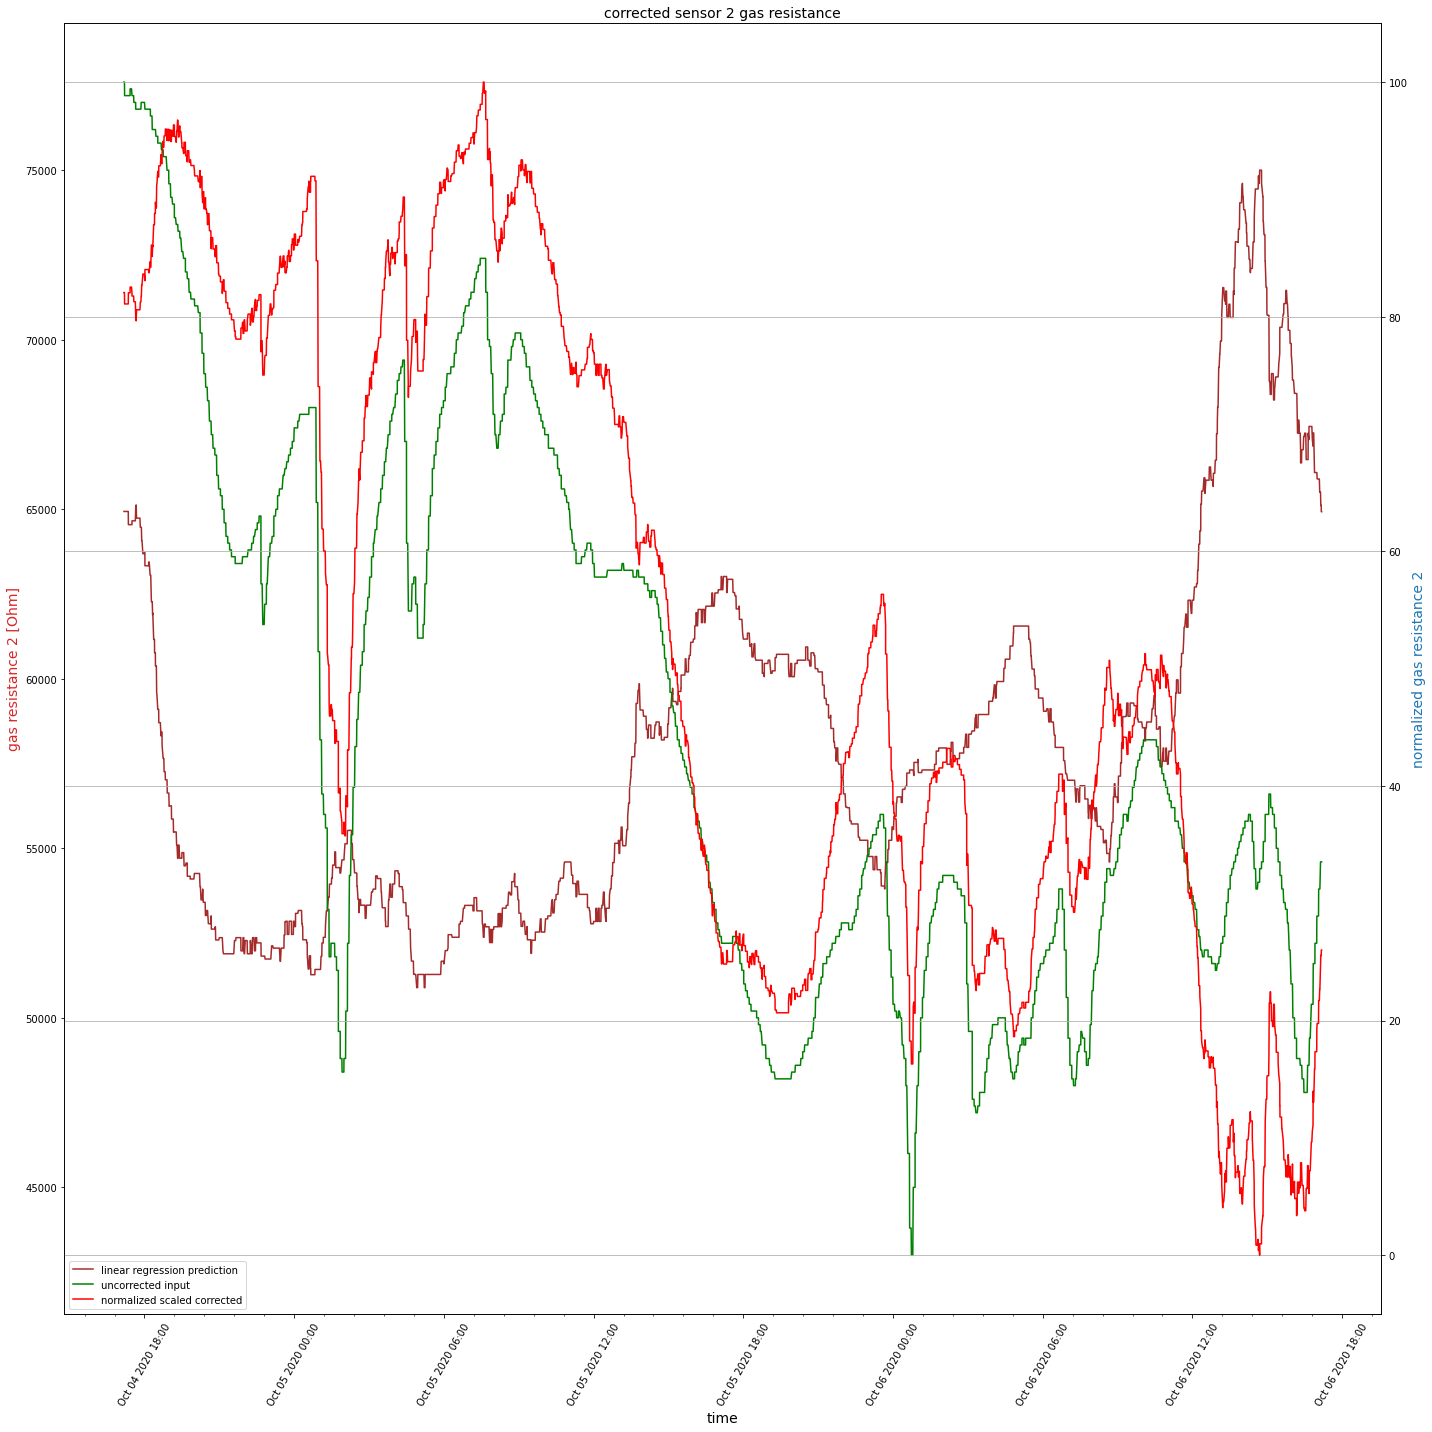

In [15]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
import numpy as np
  
df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

X = df[['temperature','absolute humidity außen']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['sensor 2']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions2 = model.predict(X) 
 
print_model = model.summary()
print(print_model)
print(model.rsquared)

residuals2=df['sensor 2']-predictions2
min_res=min(residuals2)
max_res=max(residuals2)
#clip min of residual2 to epsilon2 in order to avoid a log(0) trap
epsilon2=0.0001

normalized_residuals2=((residuals2-min_res)/(max_res-min_res)).clip(epsilon2,None)*100

fig, ax1 = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax1.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax1.xaxis.set_minor_locator(AutoMinorLocator())

lns1=plt.plot_date(df['Datum'], predictions2, linestyle='solid', marker=" ", color='brown', label='linear regression prediction')
lns2=plt.plot_date(df['Datum'], df['sensor 2'], linestyle='solid', marker=" ", color='green', label='uncorrected input')
color = 'tab:red'
ax1.set_xlabel('time', fontsize=14)
ax1.set_ylabel('gas resistance 2 [Ohm]', color=color, fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax2.xaxis.set_minor_locator(AutoMinorLocator())
color = 'tab:blue'
ax2.set_ylabel('normalized gas resistance 2', color=color, fontsize=14)  # we already handled the x-label with ax1
lns3=plt.plot_date(df['Datum'], normalized_residuals2, linestyle='solid', marker=" ", color='red', label='normalized scaled corrected')
plt.title('corrected sensor 2 gas resistance', fontsize=14)

plt.grid(True)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="lower left")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

multiple linear regression of raw gas resistance of sensor 3 in dependency of the absolute humidity and the temperature<br/>
use the prediction 'predictions3' of the mutiple linear regression to create a corrected gas resistance 'residuals3' with eliminated influence of the absolute humidity and the temperature<br/>
create a normalized scaled corrected gas resistance 'normalized_residuals3'

Intercept: 
 579802.3242120288
Coefficients: 
 [ 22246.06462549 -61085.37847776]
                                 OLS Regression Results                                
Dep. Variable:               sensor 3   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          8.733e+04
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        17:11:05   Log-Likelihood:                         -55257.
No. Observations:                4528   AIC:                                  1.105e+05
Df Residuals:                    4526   BIC:                                  1.105e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                              coef    s

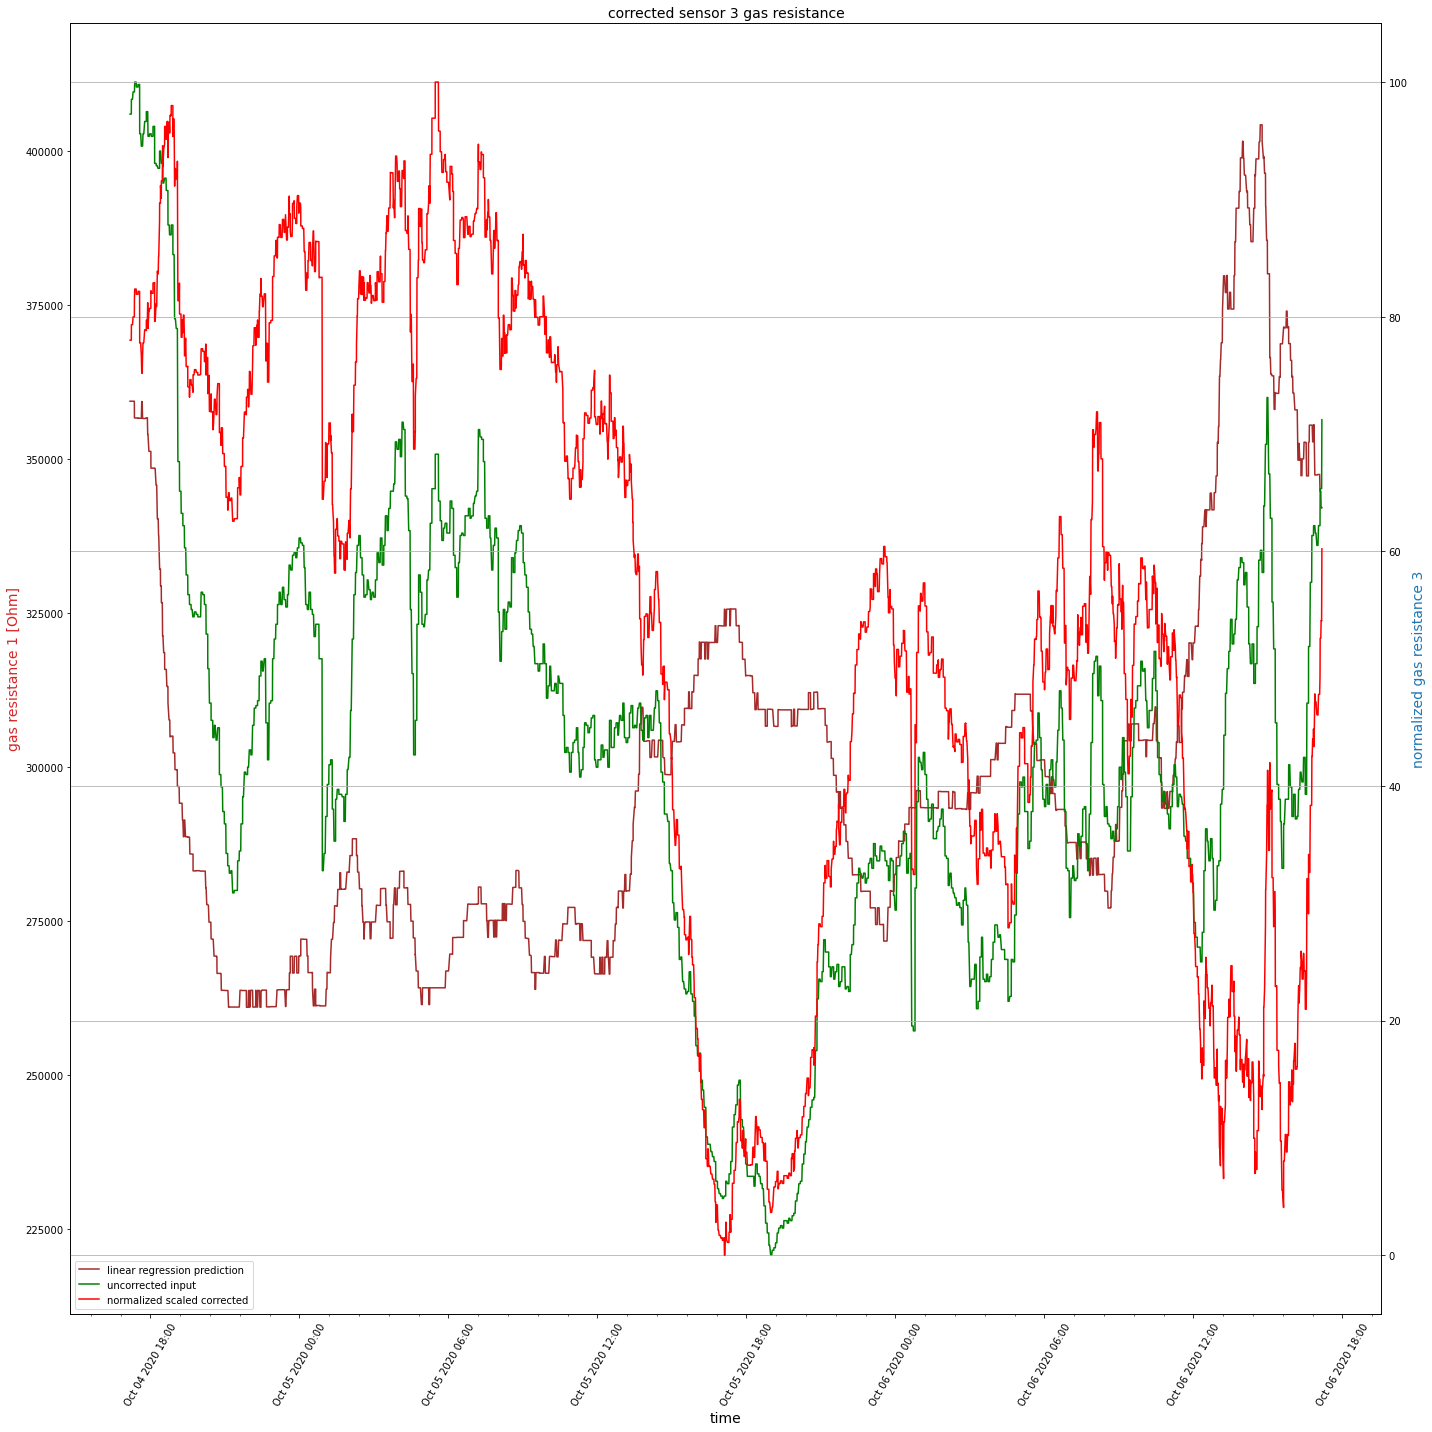

In [16]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')

df = pd.read_csv("historian.csv", sep=';', decimal=".", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'sensor 1', 'sensor 2','sensor 3', 'rLF außen', 'temperature', 'absolute humidity außen'])
#do the scaling for sensor 1-3 readings                 
df['sensor 1'] *= scale1
df['sensor 2'] *= scale2
df['sensor 3'] *= scale3

X = df[['temperature','absolute humidity außen']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['sensor 3']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions3 = model.predict(X) 
 
print_model = model.summary()
print(print_model)
print(model.rsquared)

residuals3=df['sensor 3']-predictions3
min_res=min(residuals3)
max_res=max(residuals3)
#clip min of residual3 to epsilon3 in order to avoid a log(0) trap
epsilon3=0.0001

normalized_residuals3=((residuals3-min_res)/(max_res-min_res)).clip(epsilon3,None)*100

fig, ax1 = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax1.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax1.xaxis.set_minor_locator(AutoMinorLocator())

lns1=plt.plot_date(df['Datum'], predictions3, linestyle='solid', marker=" ", color='brown', label='linear regression prediction')
lns2=plt.plot_date(df['Datum'], df['sensor 3'], linestyle='solid', marker=" ", color='green', label='uncorrected input')
color = 'tab:red'
ax1.set_xlabel('time', fontsize=14)
ax1.set_ylabel('gas resistance 1 [Ohm]', color=color, fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax2.xaxis.set_minor_locator(AutoMinorLocator())

color = 'tab:blue'
ax2.set_ylabel('normalized gas resistance 3', color=color, fontsize=14)  # we already handled the x-label with ax1
lns3=plt.plot_date(df['Datum'], normalized_residuals3, linestyle='solid', marker=" ", color='red', label='normalized scaled corrected')
plt.title('corrected sensor 3 gas resistance', fontsize=14)

plt.grid(True)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="lower left")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

time series diagrams of normalized scaled gas resistances of sensors 1-3; y range is 0.0..100.0

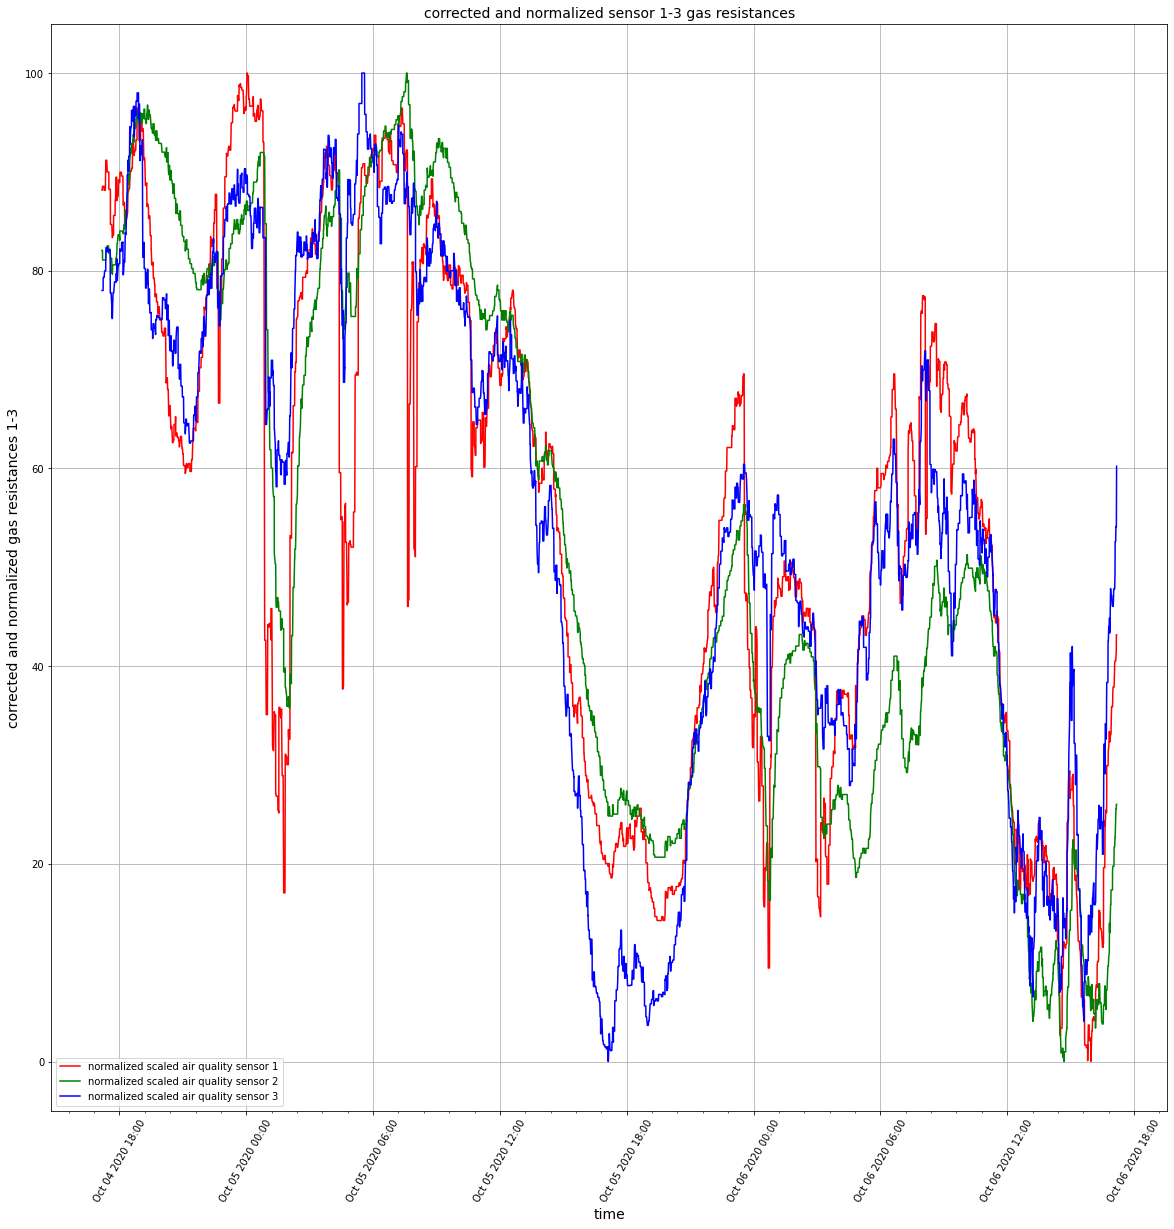

In [17]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.plot_date(df['Datum'], normalized_residuals1, linestyle='solid', marker=" ", color='red', label='normalized scaled air quality sensor 1')
plt.plot_date(df['Datum'], normalized_residuals2, linestyle='solid', marker=" ", color='green', label='normalized scaled air quality sensor 2')
plt.plot_date(df['Datum'], normalized_residuals3, linestyle='solid', marker=" ", color='blue', label='normalized scaled air quality sensor 3')
plt.title('corrected and normalized sensor 1-3 gas resistances', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('corrected and normalized gas resistances 1-3', fontsize=14)
plt.grid(True)
plt.legend(loc ="lower left")
plt.show()

time series diagrams of normalized scaled gas resistsnces of sensors 1-3 with logorithmic y scale

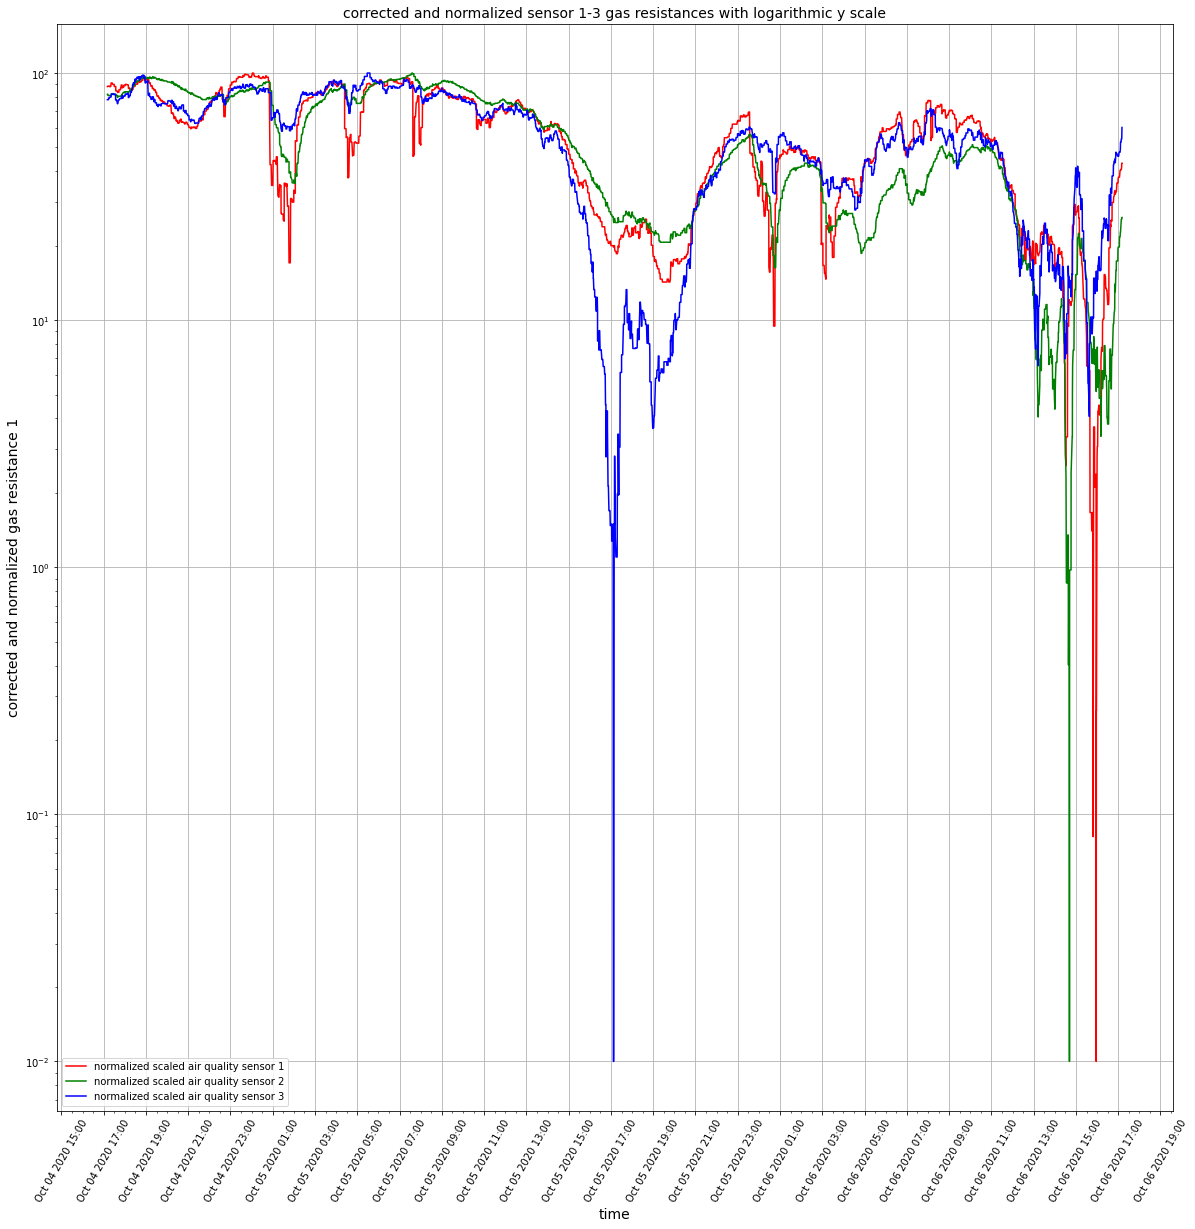

In [18]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


fig, ax = plt.subplots(figsize=(20, 20))
plt.yscale('log')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))
hours = mdates.HourLocator(interval = 2)  
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_minor_locator(AutoMinorLocator())


plt.xticks(rotation=60)
plt.plot_date(df['Datum'], normalized_residuals1, linestyle='solid', marker=" ", color='red', label='normalized scaled air quality sensor 1')
plt.plot_date(df['Datum'], normalized_residuals2, linestyle='solid', marker=" ", color='green', label='normalized scaled air quality sensor 2')
plt.plot_date(df['Datum'], normalized_residuals3, linestyle='solid', marker=" ", color='blue', label='normalized scaled air quality sensor 3')
plt.title('corrected and normalized sensor 1-3 gas resistances with logarithmic y scale', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('corrected and normalized gas resistance 1', fontsize=14)
plt.grid(True)
plt.legend(loc ="lower left")
plt.show()

time series diagrams of logarithmic air quality levels of sensors 1-3
the air quality level can vary between 0 (fresh air) and 4 (very poor air quality)

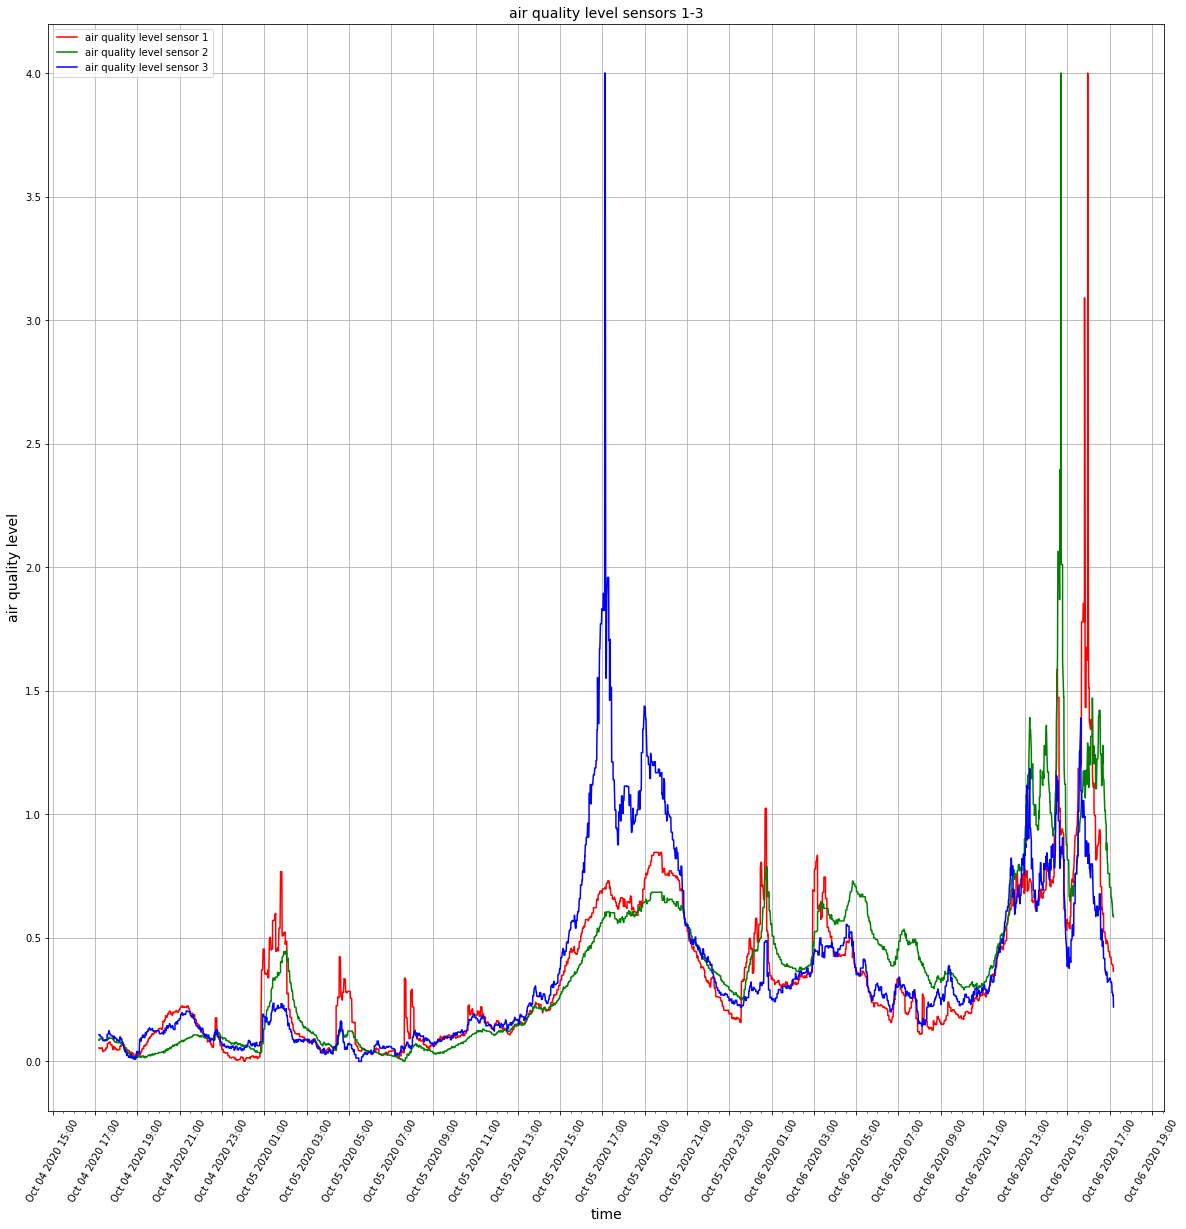

In [19]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

log_normalized_residuals1 = -(np.log10(normalized_residuals1)-2)
log_normalized_residuals2 = -(np.log10(normalized_residuals2)-2)
log_normalized_residuals3 = -(np.log10(normalized_residuals3)-2)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))
hours = mdates.HourLocator(interval = 2)  
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_minor_locator(AutoMinorLocator())


plt.xticks(rotation=60)
plt.plot_date(df['Datum'], log_normalized_residuals1, linestyle='solid', marker=" ", color='red', label='air quality level sensor 1')
plt.plot_date(df['Datum'], log_normalized_residuals2, linestyle='solid', marker=" ", color='green', label='air quality level sensor 2')
plt.plot_date(df['Datum'], log_normalized_residuals3, linestyle='solid', marker=" ", color='blue', label='air quality level sensor 3')
plt.title('air quality level sensors 1-3', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('air quality level', fontsize=14)
plt.grid(True)
plt.legend(loc ="upper left")
plt.show()

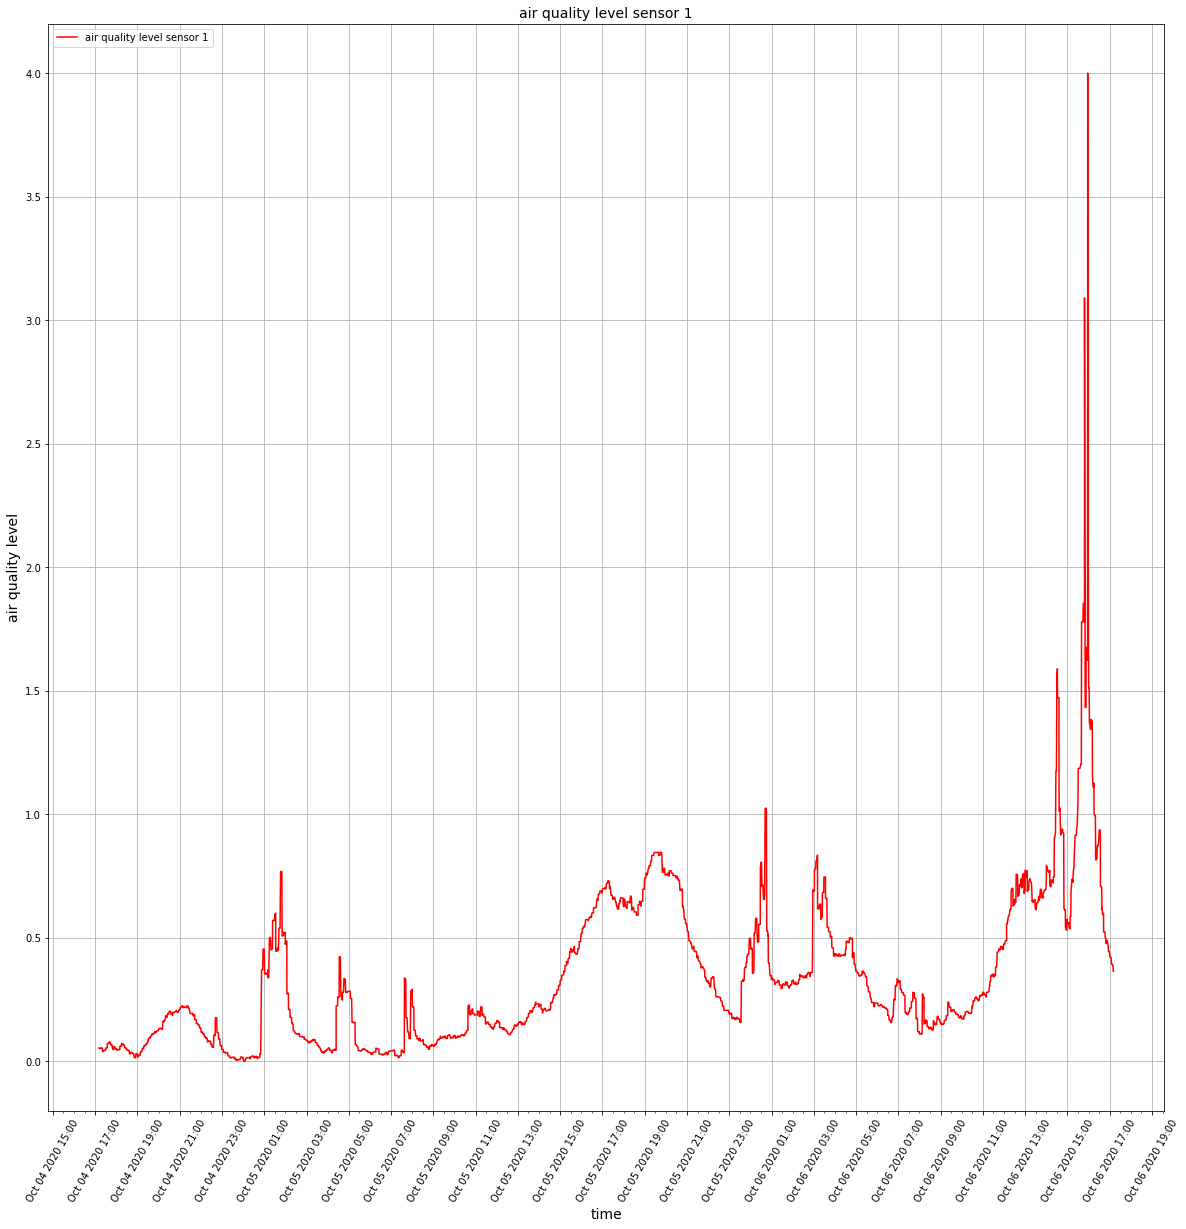

In [20]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

log_normalized_residuals1 = -(np.log10(normalized_residuals1)-2)
log_normalized_residuals2 = -(np.log10(normalized_residuals2)-2)
log_normalized_residuals3 = -(np.log10(normalized_residuals3)-2)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))
hours = mdates.HourLocator(interval = 2)  
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_minor_locator(AutoMinorLocator())


plt.xticks(rotation=60)
plt.plot_date(df['Datum'], log_normalized_residuals1, linestyle='solid', marker=" ", color='red', label='air quality level sensor 1')
plt.title('air quality level sensor 1', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('air quality level', fontsize=14)
plt.grid(True)
plt.legend(loc ="upper left")
plt.show()

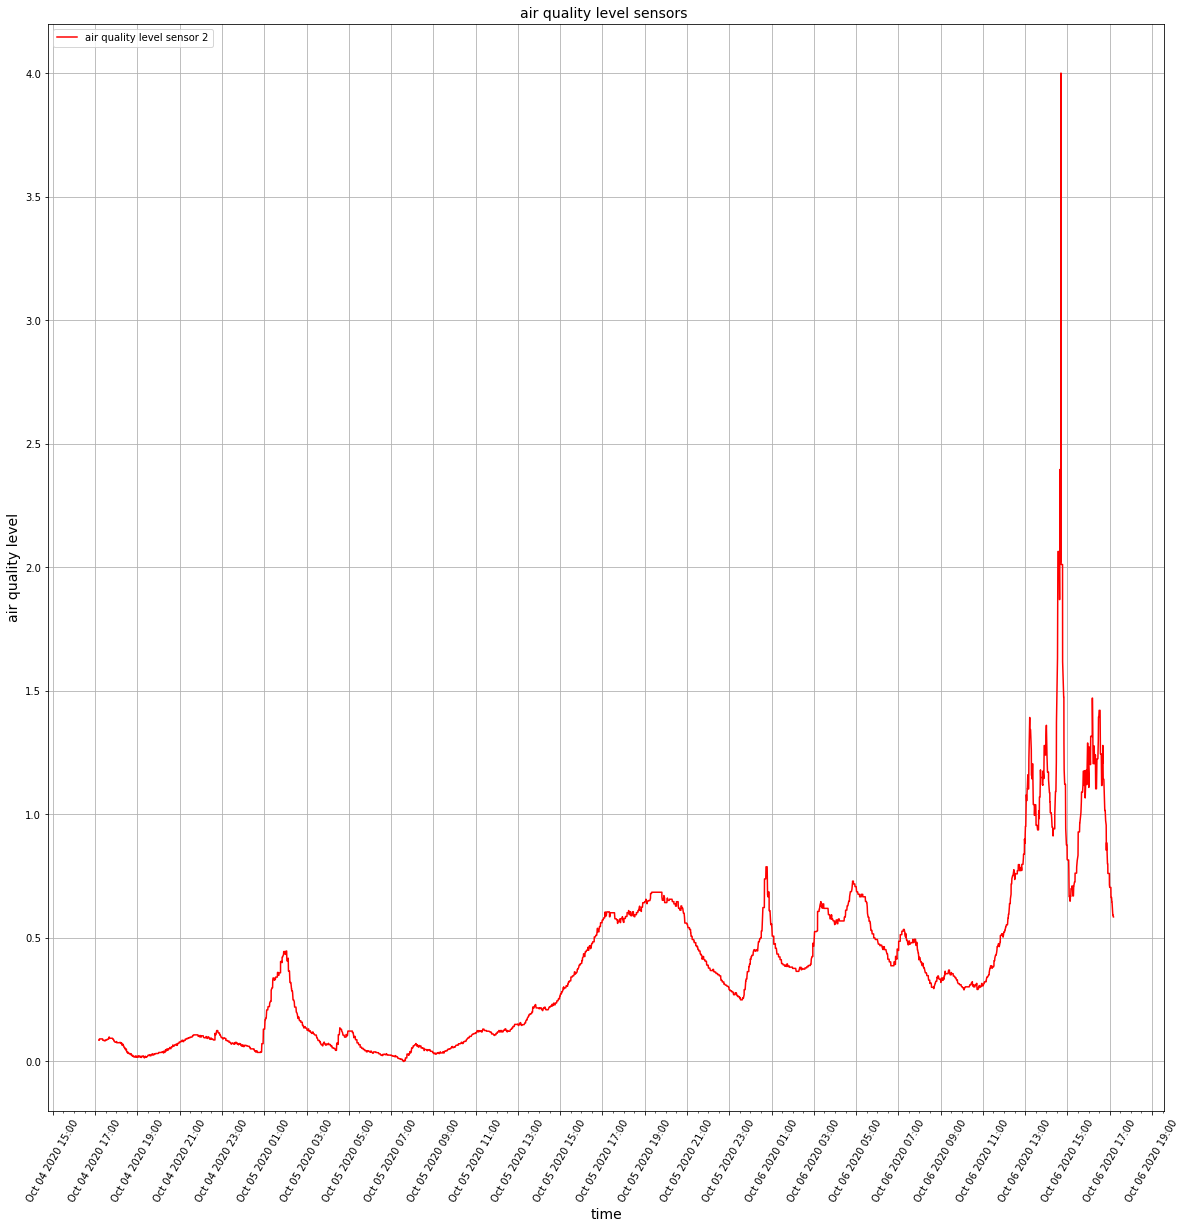

In [21]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

log_normalized_residuals1 = -(np.log10(normalized_residuals1)-2)
log_normalized_residuals2 = -(np.log10(normalized_residuals2)-2)
log_normalized_residuals3 = -(np.log10(normalized_residuals3)-2)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))
hours = mdates.HourLocator(interval = 2)  
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_minor_locator(AutoMinorLocator())


plt.xticks(rotation=60)
plt.plot_date(df['Datum'], log_normalized_residuals2, linestyle='solid', marker=" ", color='red', label='air quality level sensor 2')
plt.title('air quality level sensors ', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('air quality level', fontsize=14)
plt.grid(True)
plt.legend(loc ="upper left")
plt.show()

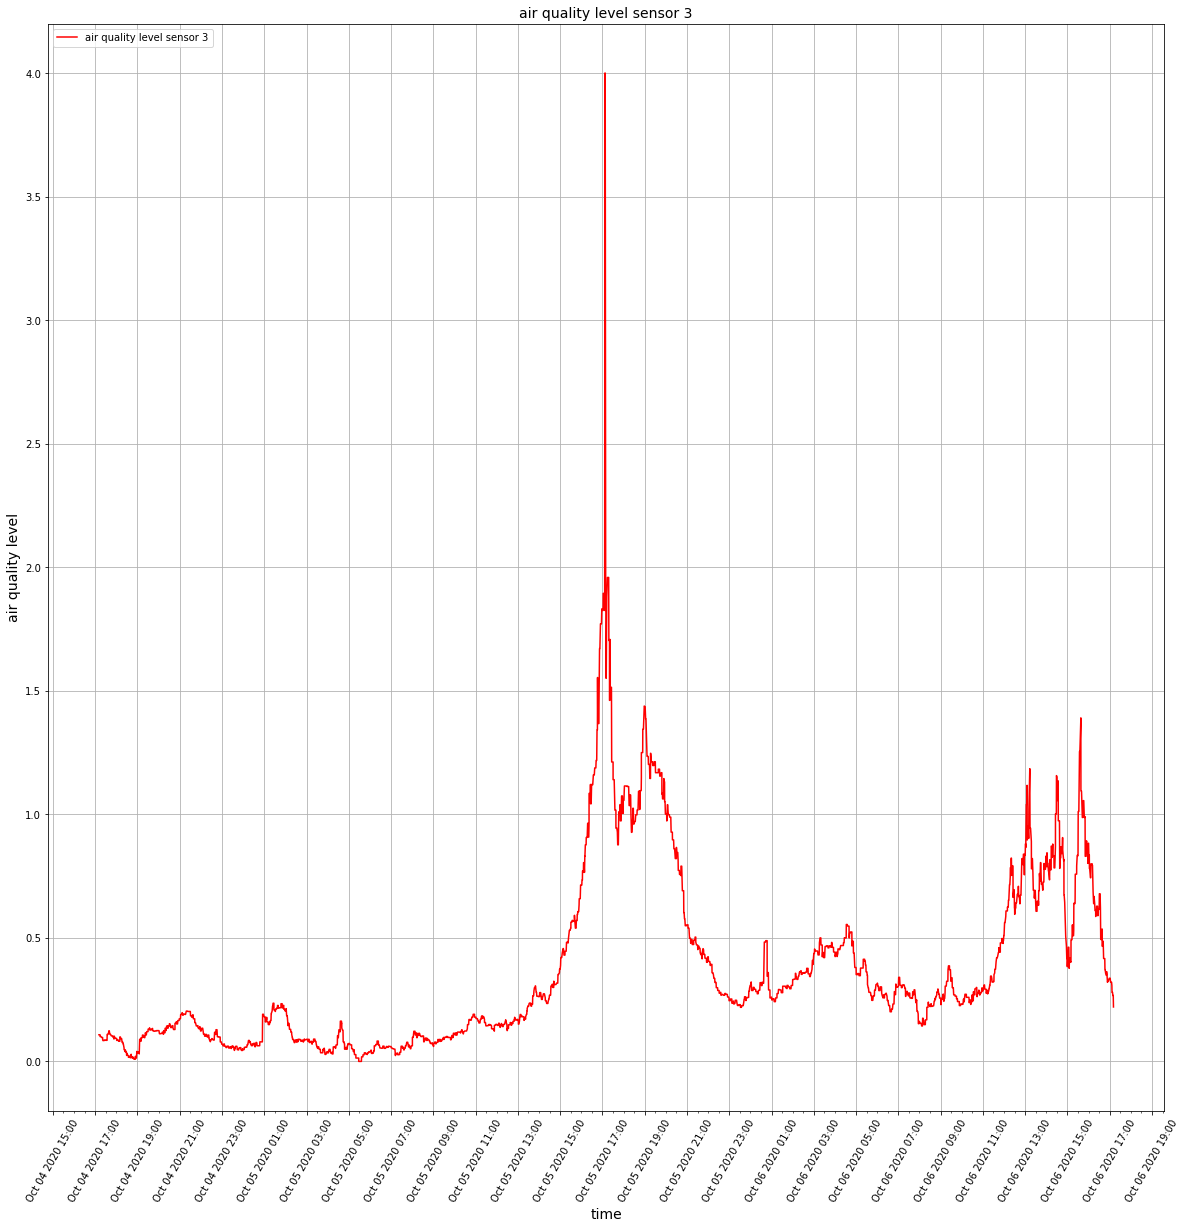

In [22]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

log_normalized_residuals1 = -(np.log10(normalized_residuals1)-2)
log_normalized_residuals2 = -(np.log10(normalized_residuals2)-2)
log_normalized_residuals3 = -(np.log10(normalized_residuals3)-2)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))
hours = mdates.HourLocator(interval = 2)  
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_minor_locator(AutoMinorLocator())


plt.xticks(rotation=60)
plt.plot_date(df['Datum'], log_normalized_residuals3, linestyle='solid', marker=" ", color='red', label='air quality level sensor 3')
plt.title('air quality level sensor 3', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('air quality level', fontsize=14)
plt.grid(True)
plt.legend(loc ="upper left")
plt.show()